In [293]:
!pip install squarify

In [1]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

from itertools import permutations
from mlxtend.preprocessing import TransactionEncoder

# for market basket analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from pandas.plotting import parallel_coordinates
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import networkx as nx
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly
import igraph as ig
from plotly.graph_objs import *

C:\Users\HP\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\HP\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\HP\anaconda3\lib\site-packages\xarray\core\pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
C:\Users\HP\anaconda3\lib\site-packages\xarray\core\pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion("0.0.0")
C:\Users\HP\anaconda3\lib\site-packages\xarray\core\pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duc

In [2]:
gro_df=pd.read_csv("C:/Users/HP/Desktop/DS Project by FEYNN LAB/Groceryshop/Groceries data.csv")
gro_df

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4
...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,6
38761,2022,2014-02-23,candy,2014,2,23,6
38762,1097,2014-04-16,cake bar,2014,4,16,2
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,2


In [3]:
gro_df.describe()

,Member_number,year,month,day,day_of_week
count,38765.000000,38765.000000,38765.000000,38765.000000,38765.000000
mean,3003.641868,2014.528518,6.477570,15.753231,3.014498
std,1153.611031,0.499193,3.431561,8.801391,1.987669
min,1000.000000,2014.000000,1.000000,1.000000,0.000000
25%,2002.000000,2014.000000,4.000000,8.000000,1.000000
50%,3005.000000,2015.000000,6.000000,16.000000,3.000000
75%,4007.000000,2015.000000,9.000000,23.000000,5.000000
max,5000.000000,2015.000000,12.000000,31.000000,6.000000


In [4]:
freq_items = gro_df['itemDescription'].value_counts()
freq_items.head(10)

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: itemDescription, dtype: int64

# EDA



In [5]:
gro_df.shape

(38765, 7)

In [6]:
gro_df.columns

Index(['Member_number', 'Date', 'itemDescription', 'year', 'month', 'day',
       'day_of_week'],
      dtype='object')

In [7]:
gro_df.tail(5)

,Member_number,Date,itemDescription,year,month,day,day_of_week
38760,4471,2014-08-10,sliced cheese,2014,8,10,6
38761,2022,2014-02-23,candy,2014,2,23,6
38762,1097,2014-04-16,cake bar,2014,4,16,2
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,2
38764,1521,2014-12-26,cat food,2014,12,26,4


In [8]:
gro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int64 
 4   month            38765 non-null  int64 
 5   day              38765 non-null  int64 
 6   day_of_week      38765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.1+ MB


In [9]:
type(gro_df)

pandas.core.frame.DataFrame

In [10]:
gro_df.dtypes

Member_number       int64
Date               object
itemDescription    object
year                int64
month               int64
day                 int64
day_of_week         int64
dtype: object

In [11]:
len(gro_df)

38765

In [12]:
gro_df.isna().sum()

Member_number      0
Date               0
itemDescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64

In [13]:
# checking duplicates
len(gro_df[gro_df.duplicated(keep='first')==True])

759

In [14]:
# Dropping the duplicates
gro_df.drop_duplicates(inplace=True)

In [15]:
# size after dropping duplicates
len(gro_df)

38006

<AxesSubplot:xlabel='itemDescription'>

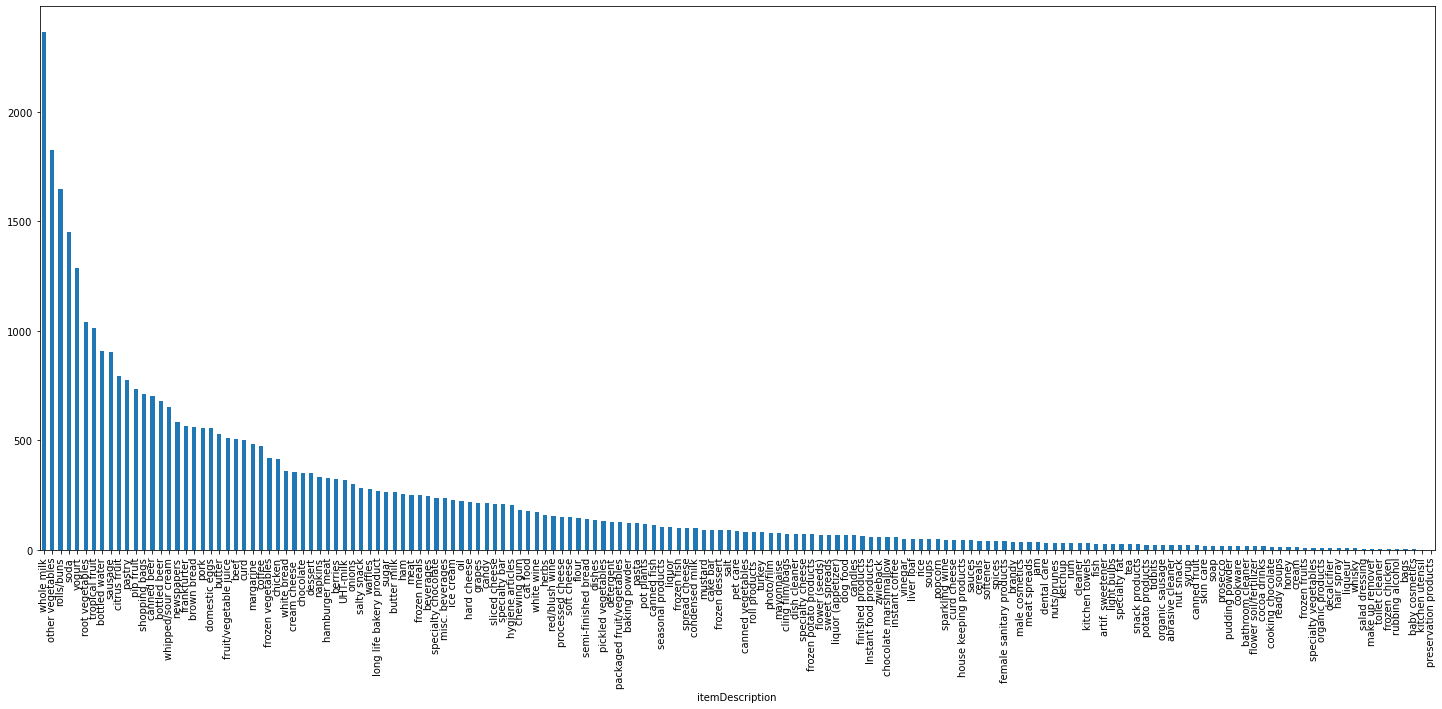

In [17]:
plt.figure(figsize=(25,10))
grouped = gro_df[['itemDescription']].groupby('itemDescription').size()
grouped.sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:>

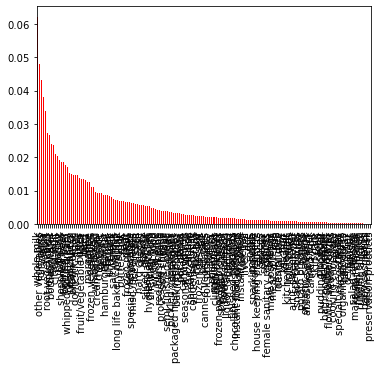

In [24]:
rel_freq=gro_df['itemDescription'].value_counts() / len(gro_df)
rel_freq.sort_values(ascending=False).plot(kind='bar',color='red')

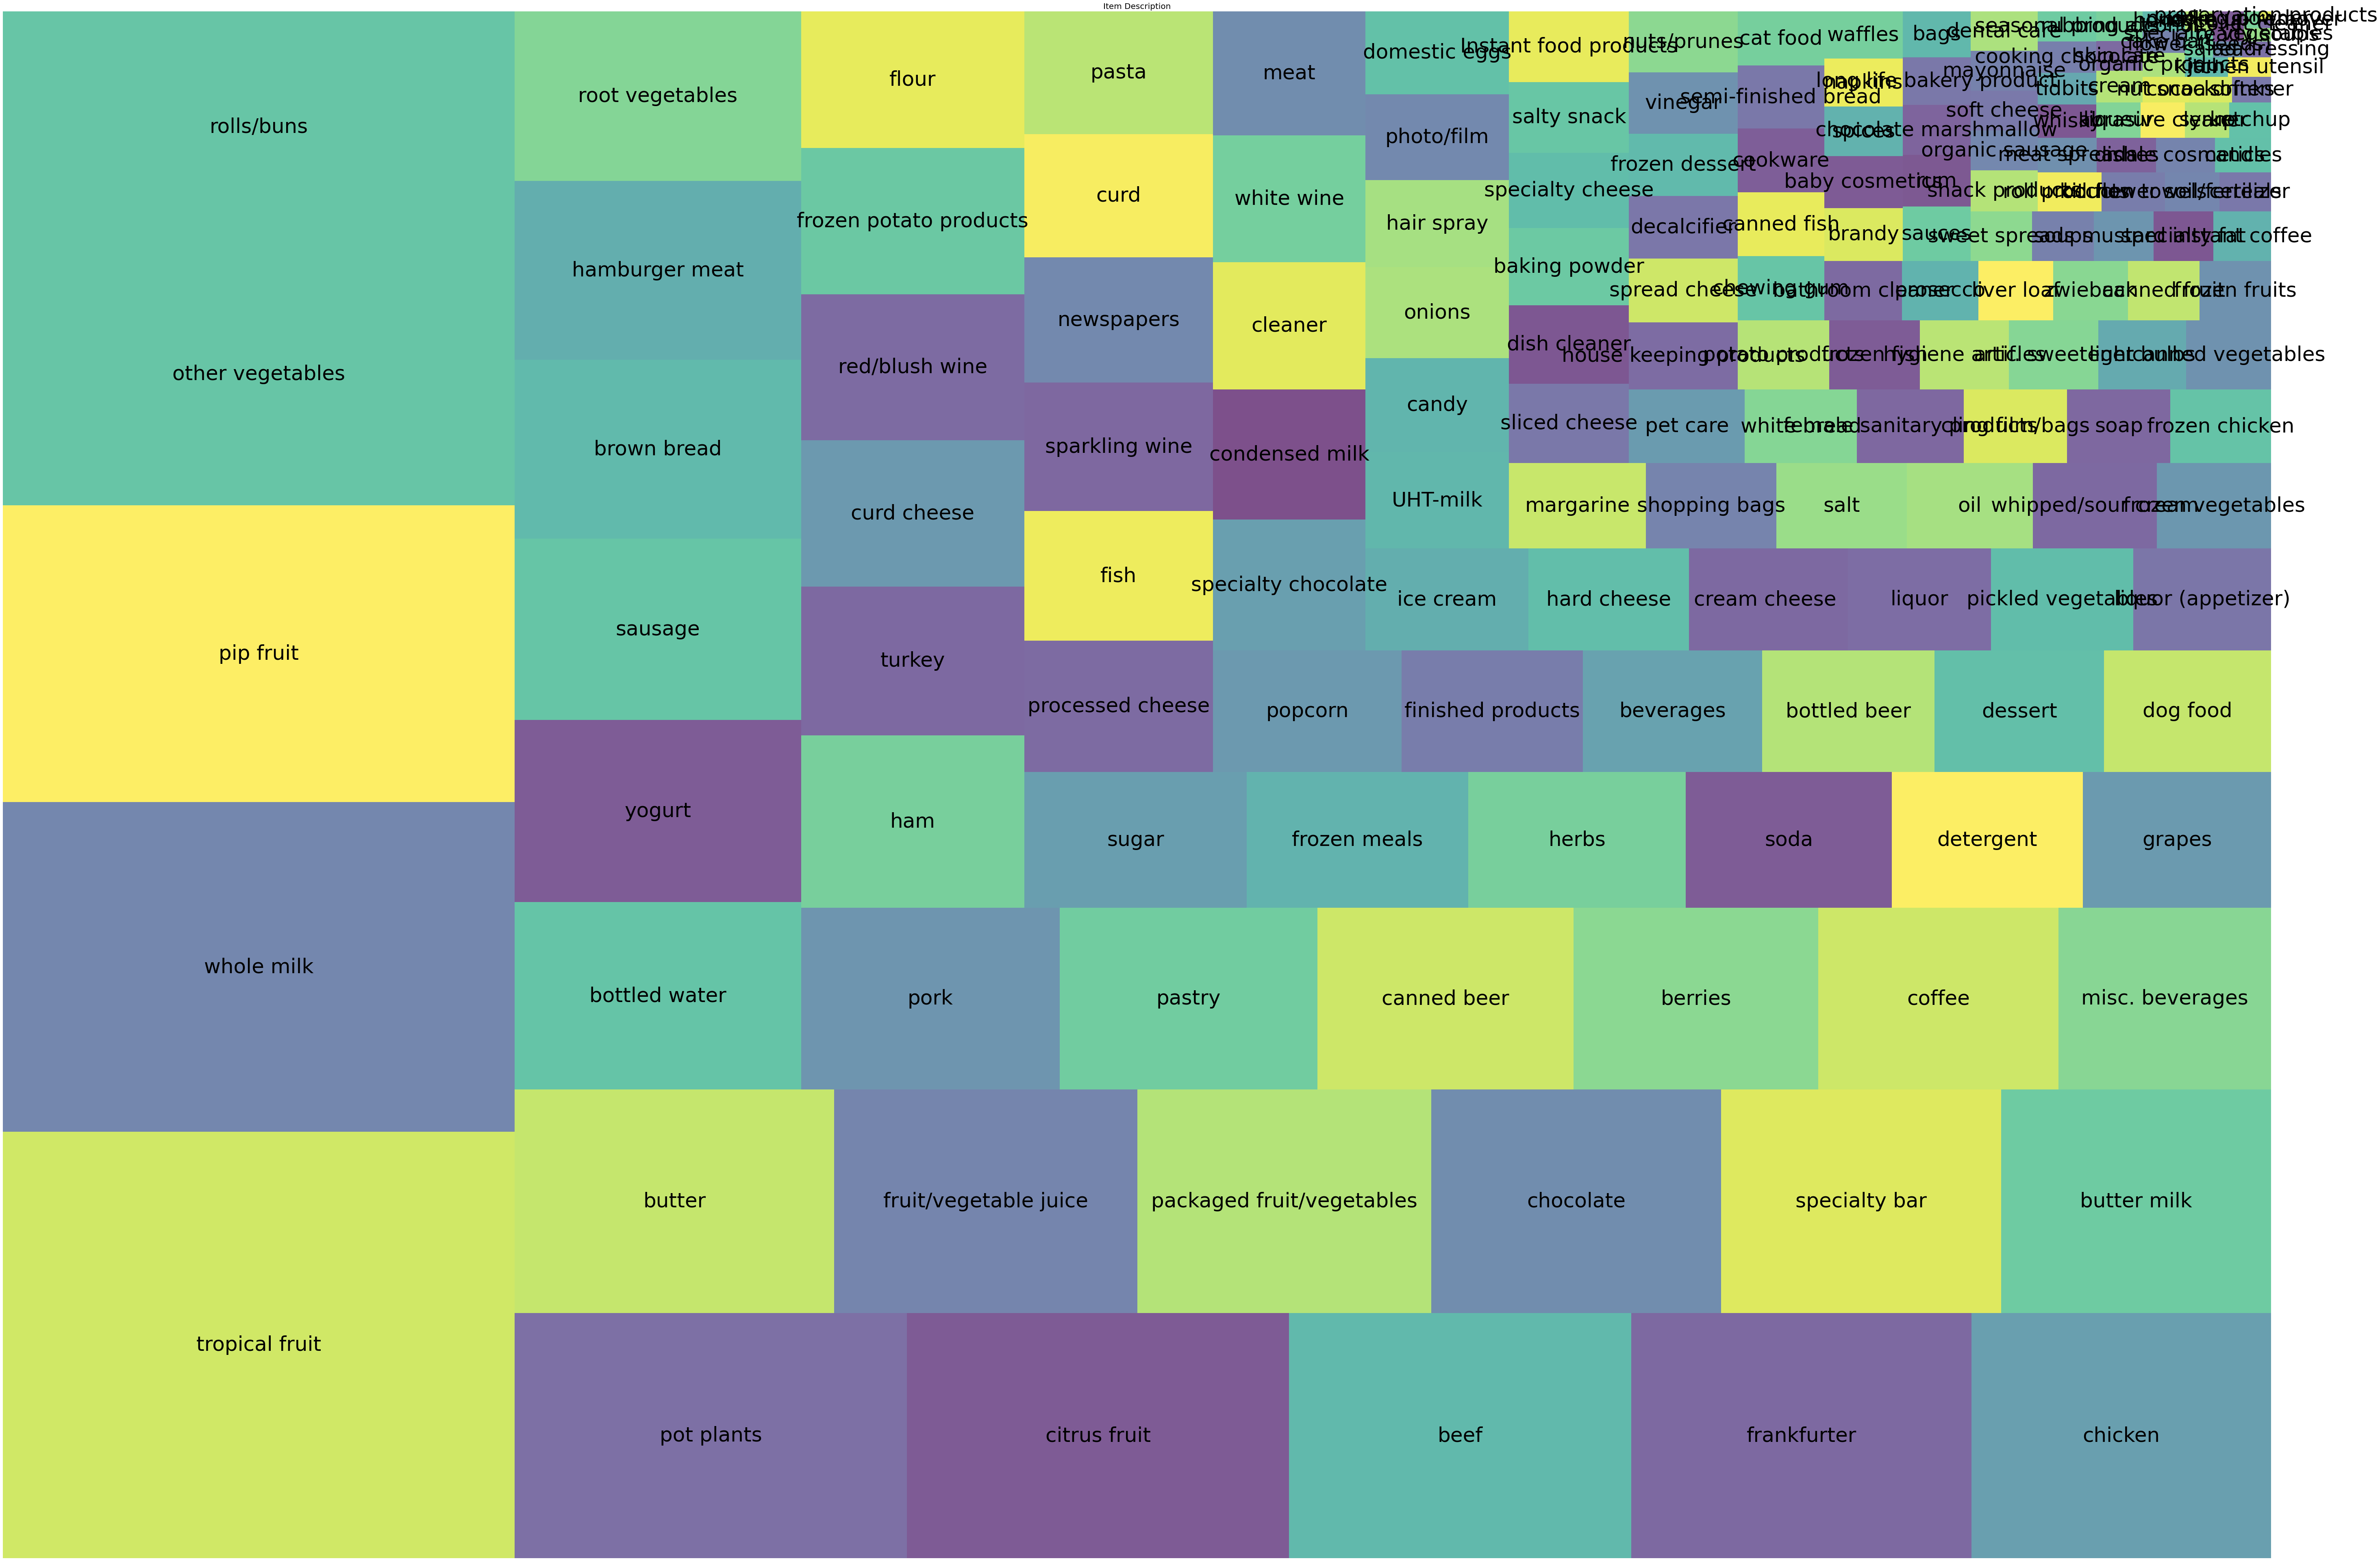

In [20]:
import squarify
plt.figure(figsize = (100, 70))
squarify.plot(sizes = gro_df.itemDescription.value_counts().values, alpha = 0.7,
              label = gro_df.itemDescription.unique(), text_kwargs={'fontsize':50})
plt.title('Item Description', fontsize = 20)
plt.axis('off')
plt.show()

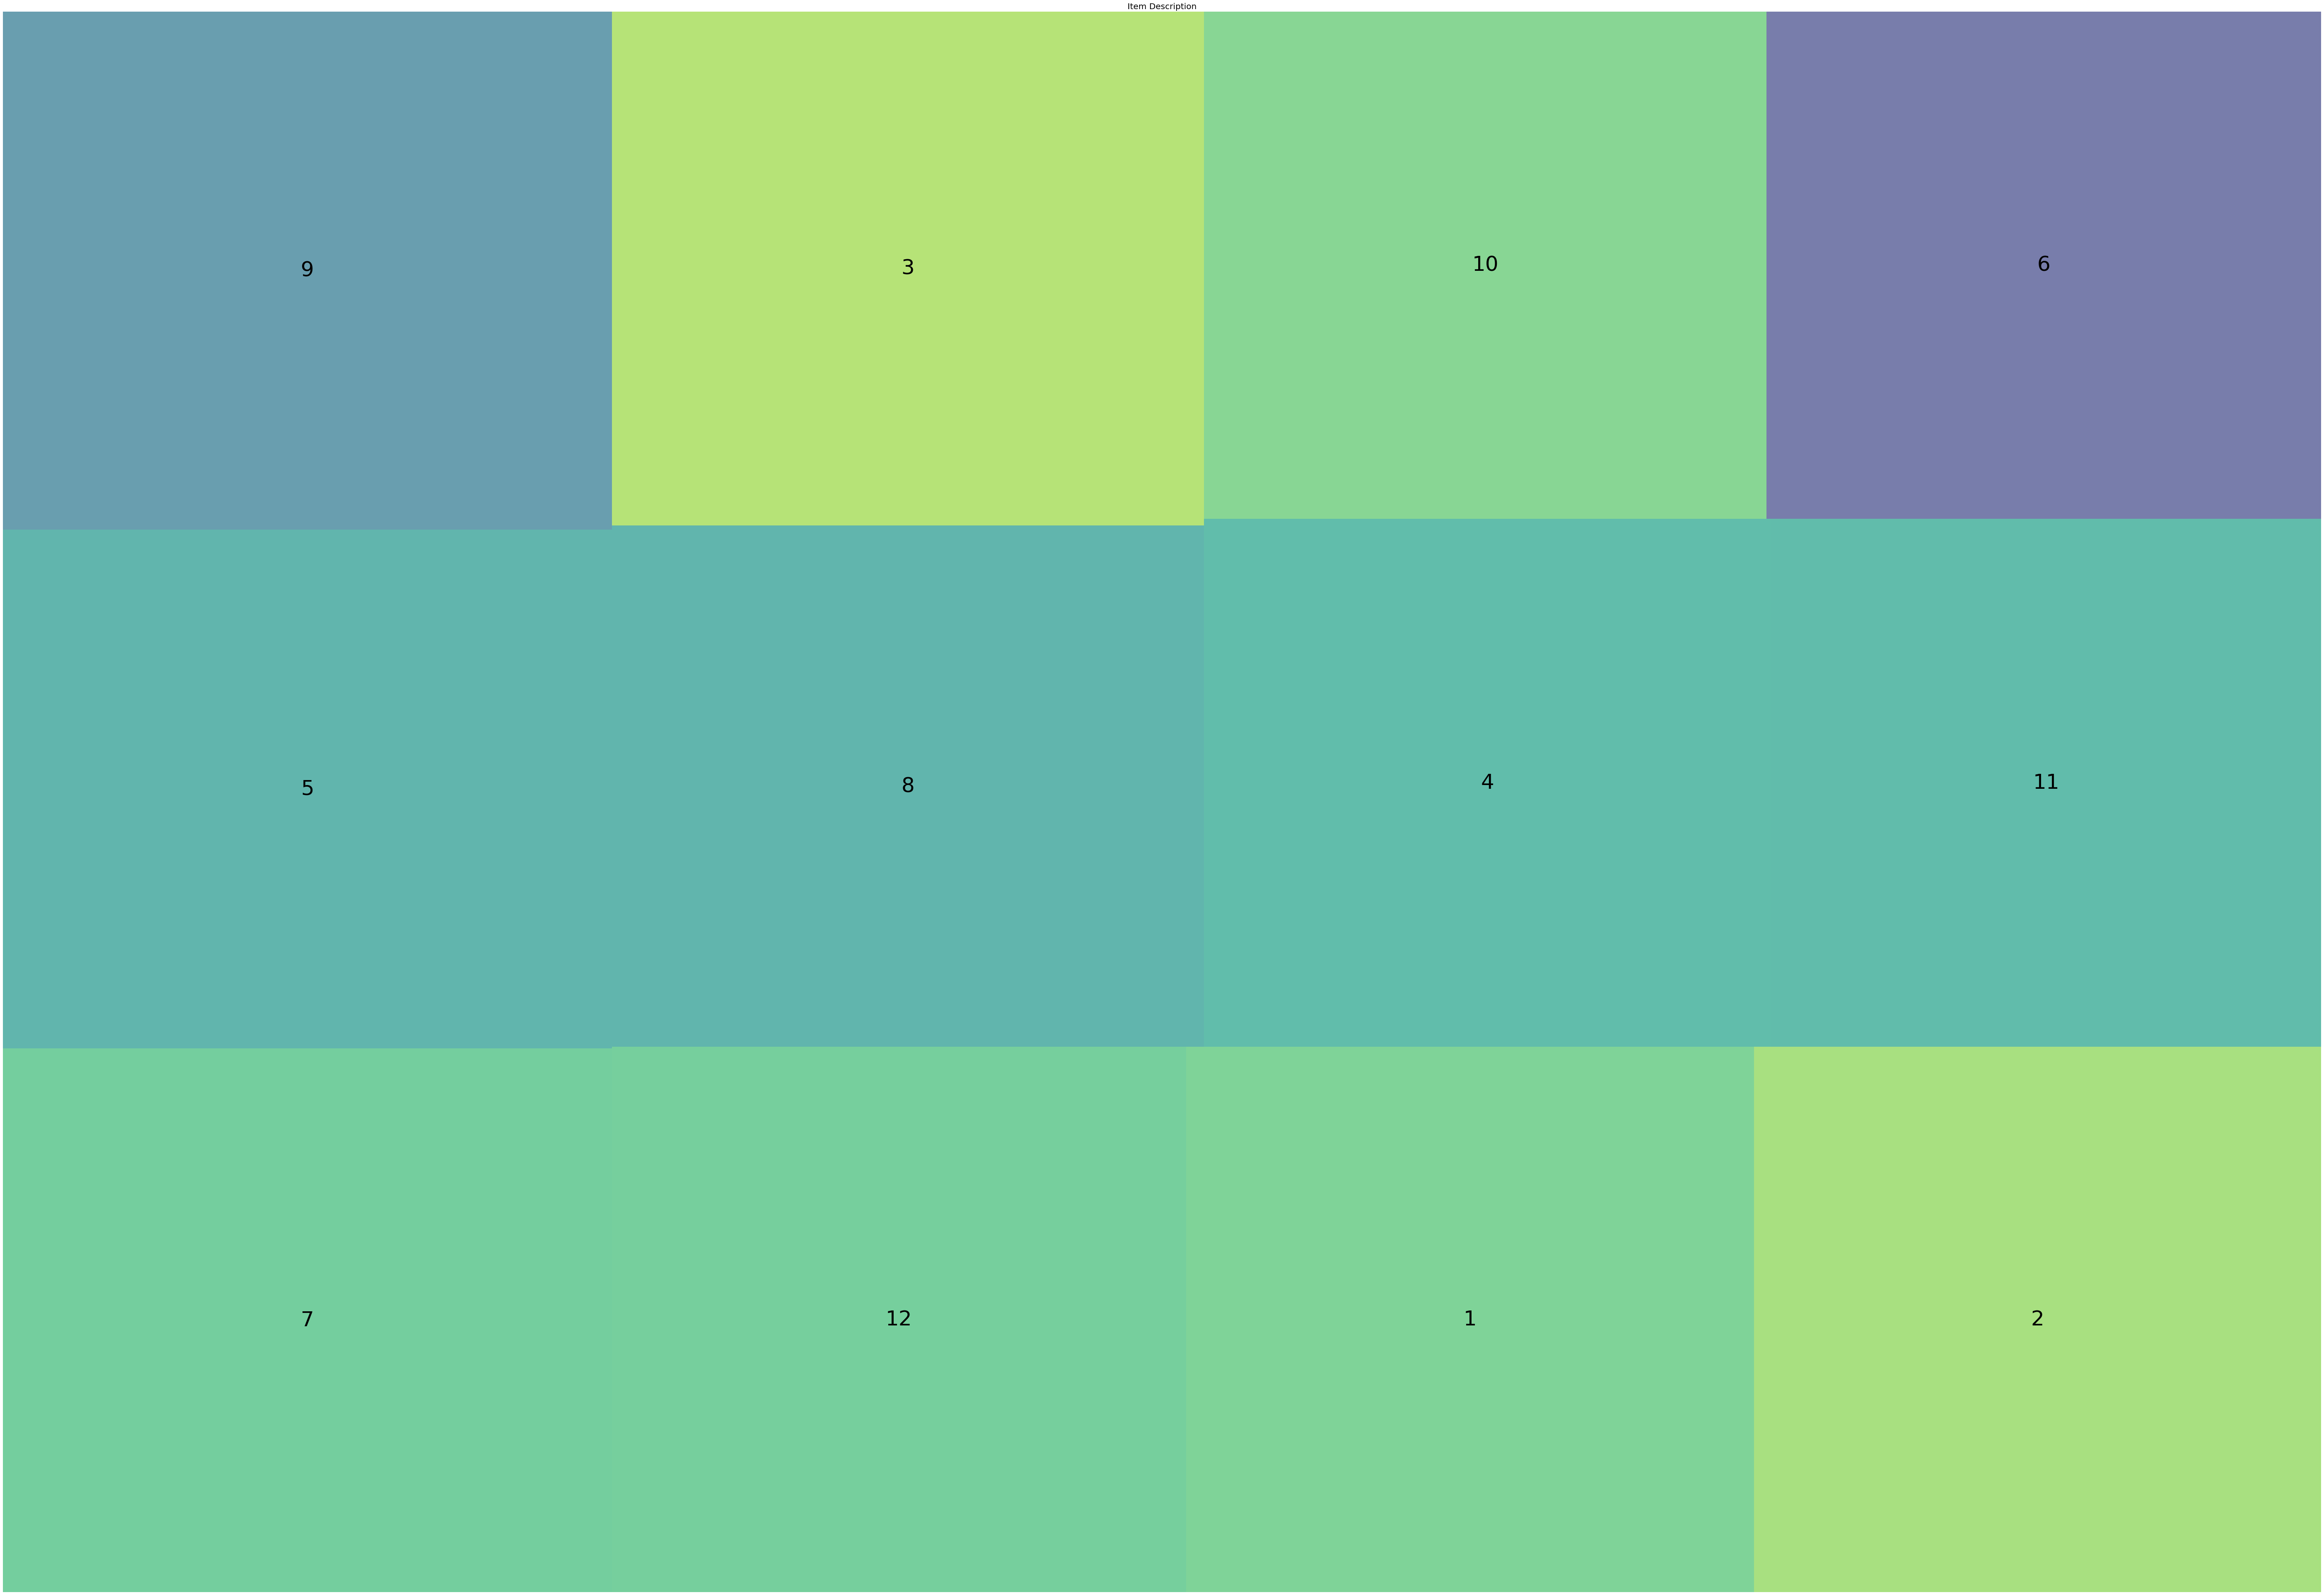

In [26]:
import squarify
plt.figure(figsize = (100, 70))
squarify.plot(sizes = gro_df.month.value_counts().values, alpha = 0.7,
              label = gro_df.month.unique(), text_kwargs={'fontsize':50})
plt.title('Item Description', fontsize = 20)
plt.axis('off')
plt.show()

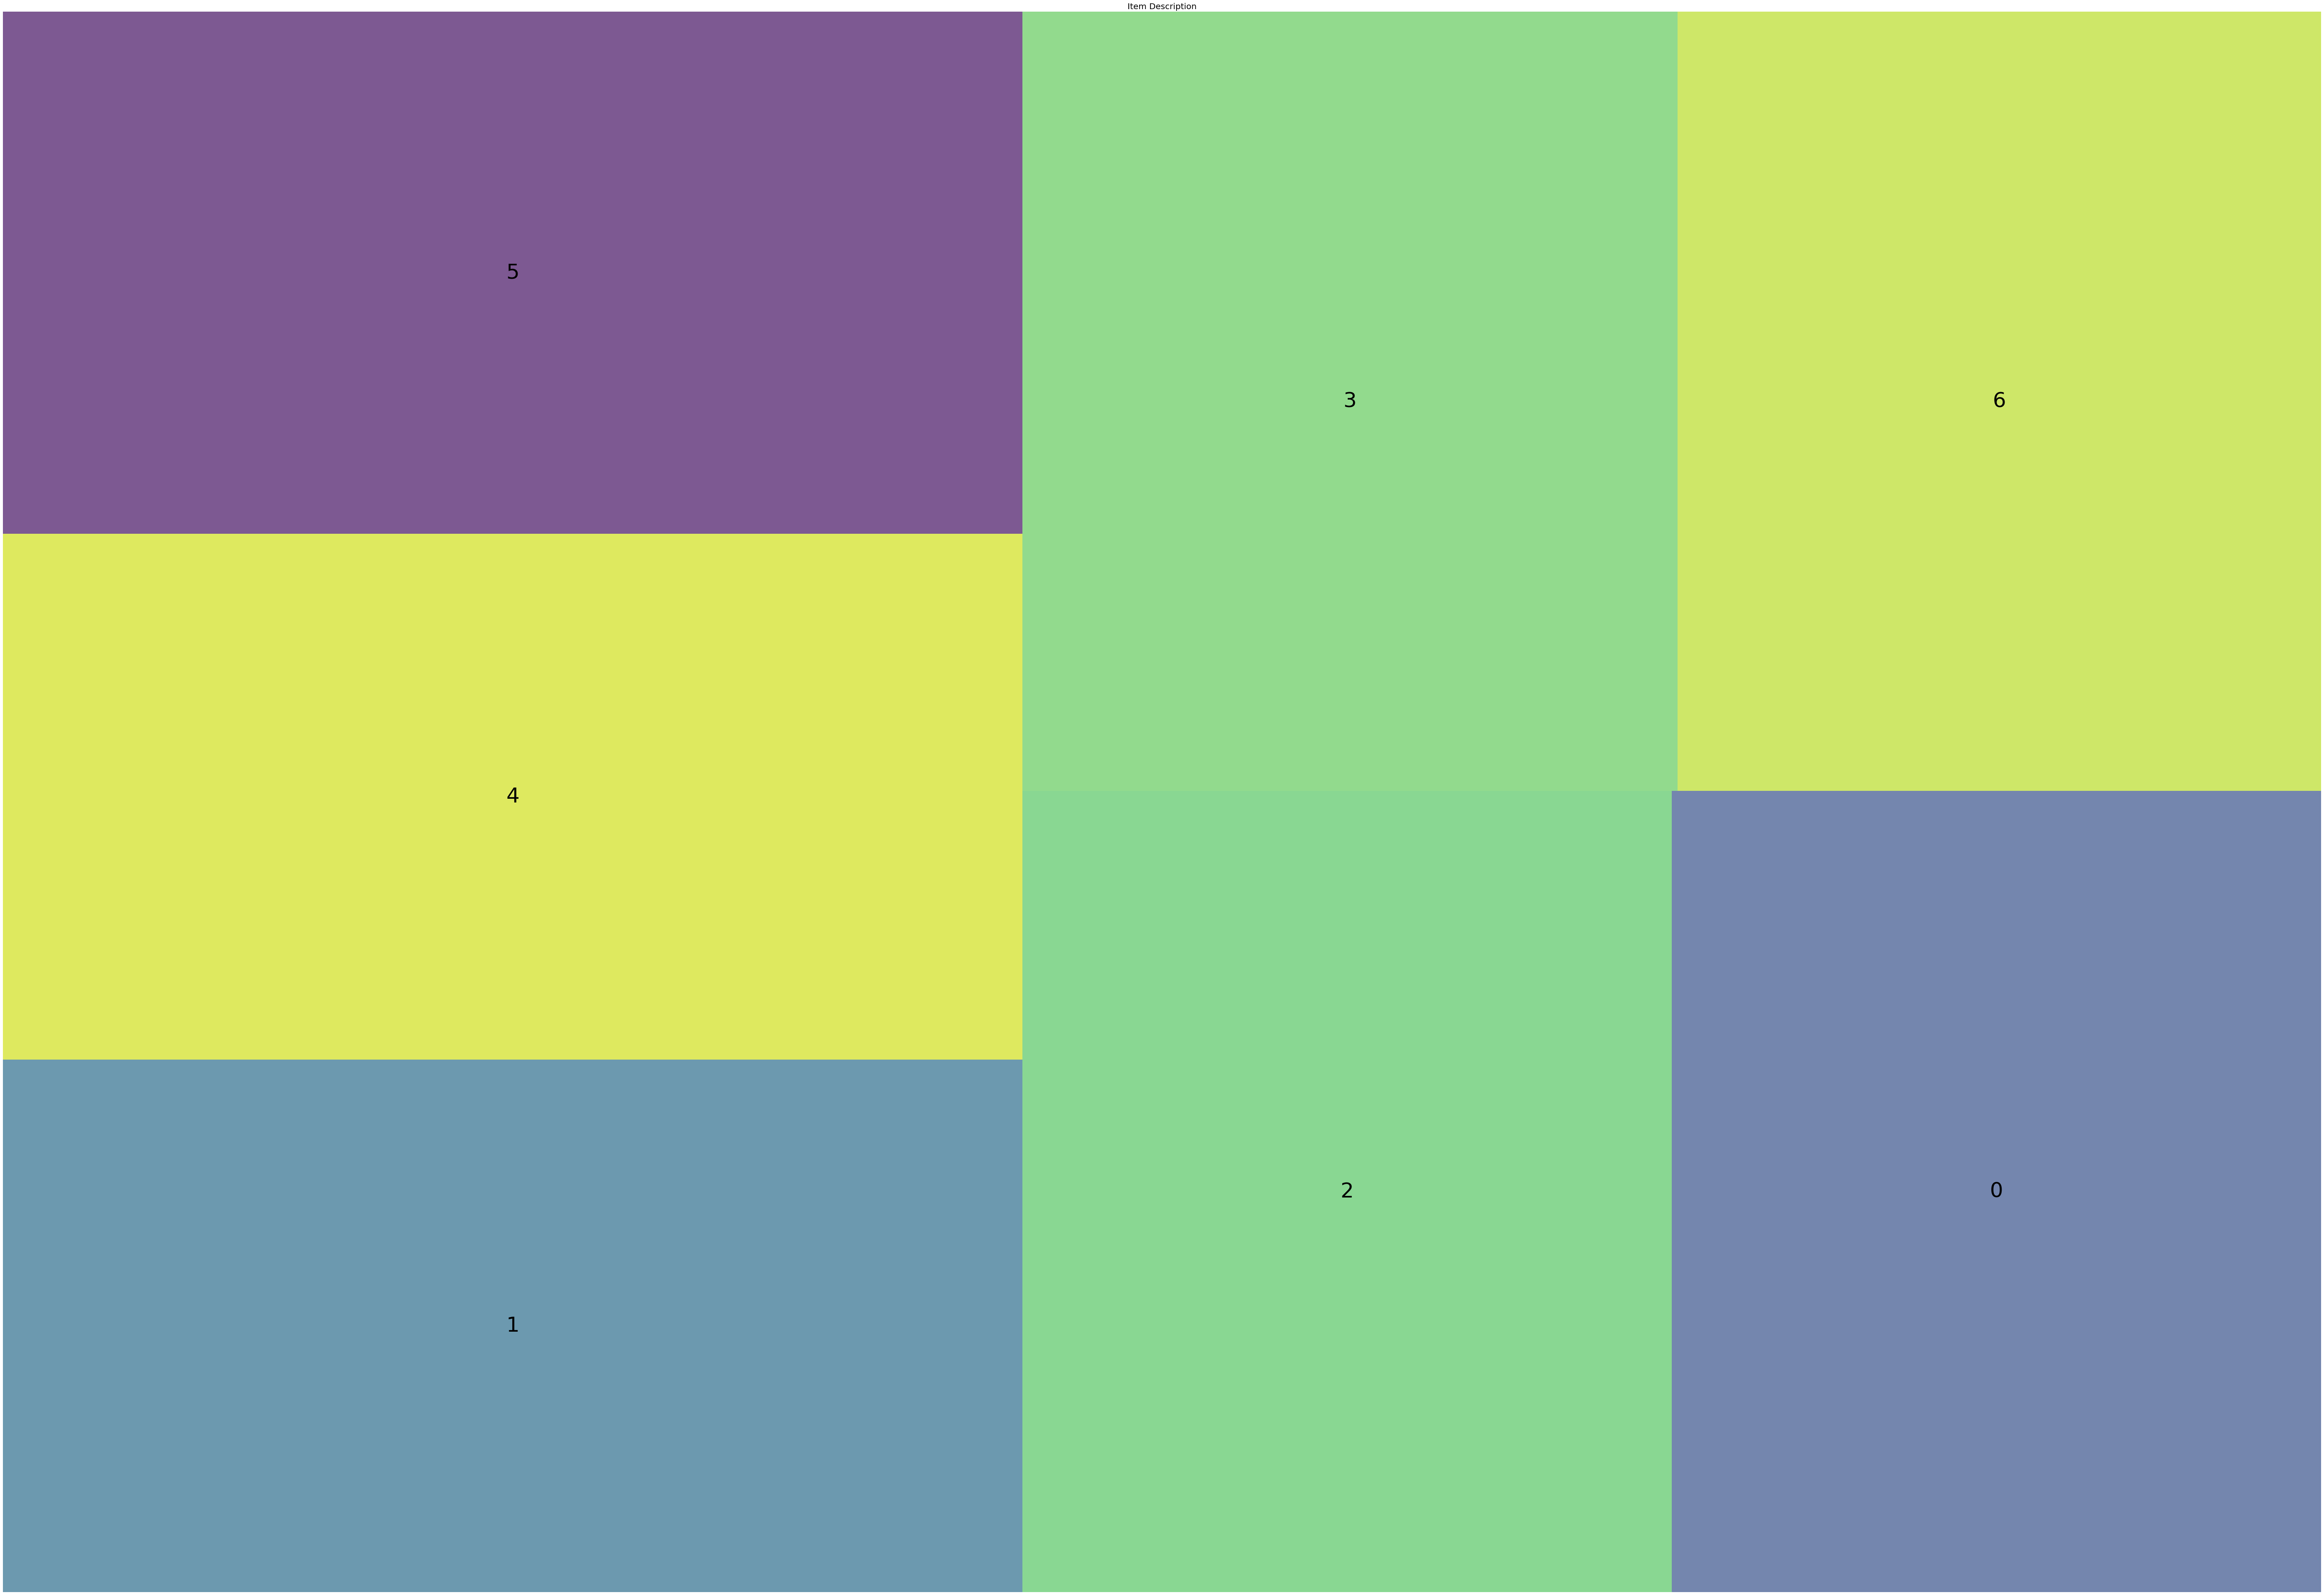

In [27]:
import squarify
plt.figure(figsize = (100, 70))
squarify.plot(sizes = gro_df.day_of_week.value_counts().values, alpha = 0.7,
              label = gro_df.day_of_week.unique(), text_kwargs={'fontsize':50})
plt.title('Item Description', fontsize = 20)
plt.axis('off')
plt.show()

### Checking different number of items

In [70]:
## Gives unique value total value counts
gro_df['itemDescription'].value_counts(ascending=False).reset_index()

,index,itemDescription
0,whole milk,2363
1,other vegetables,1827
2,rolls/buns,1646
3,soda,1453
4,yogurt,1285
...,...,...
162,rubbing alcohol,5
163,bags,4
164,baby cosmetics,3
165,kitchen utensil,1


In [30]:
!pip install wordcloud

(-0.5, 499.5, 299.5, -0.5)

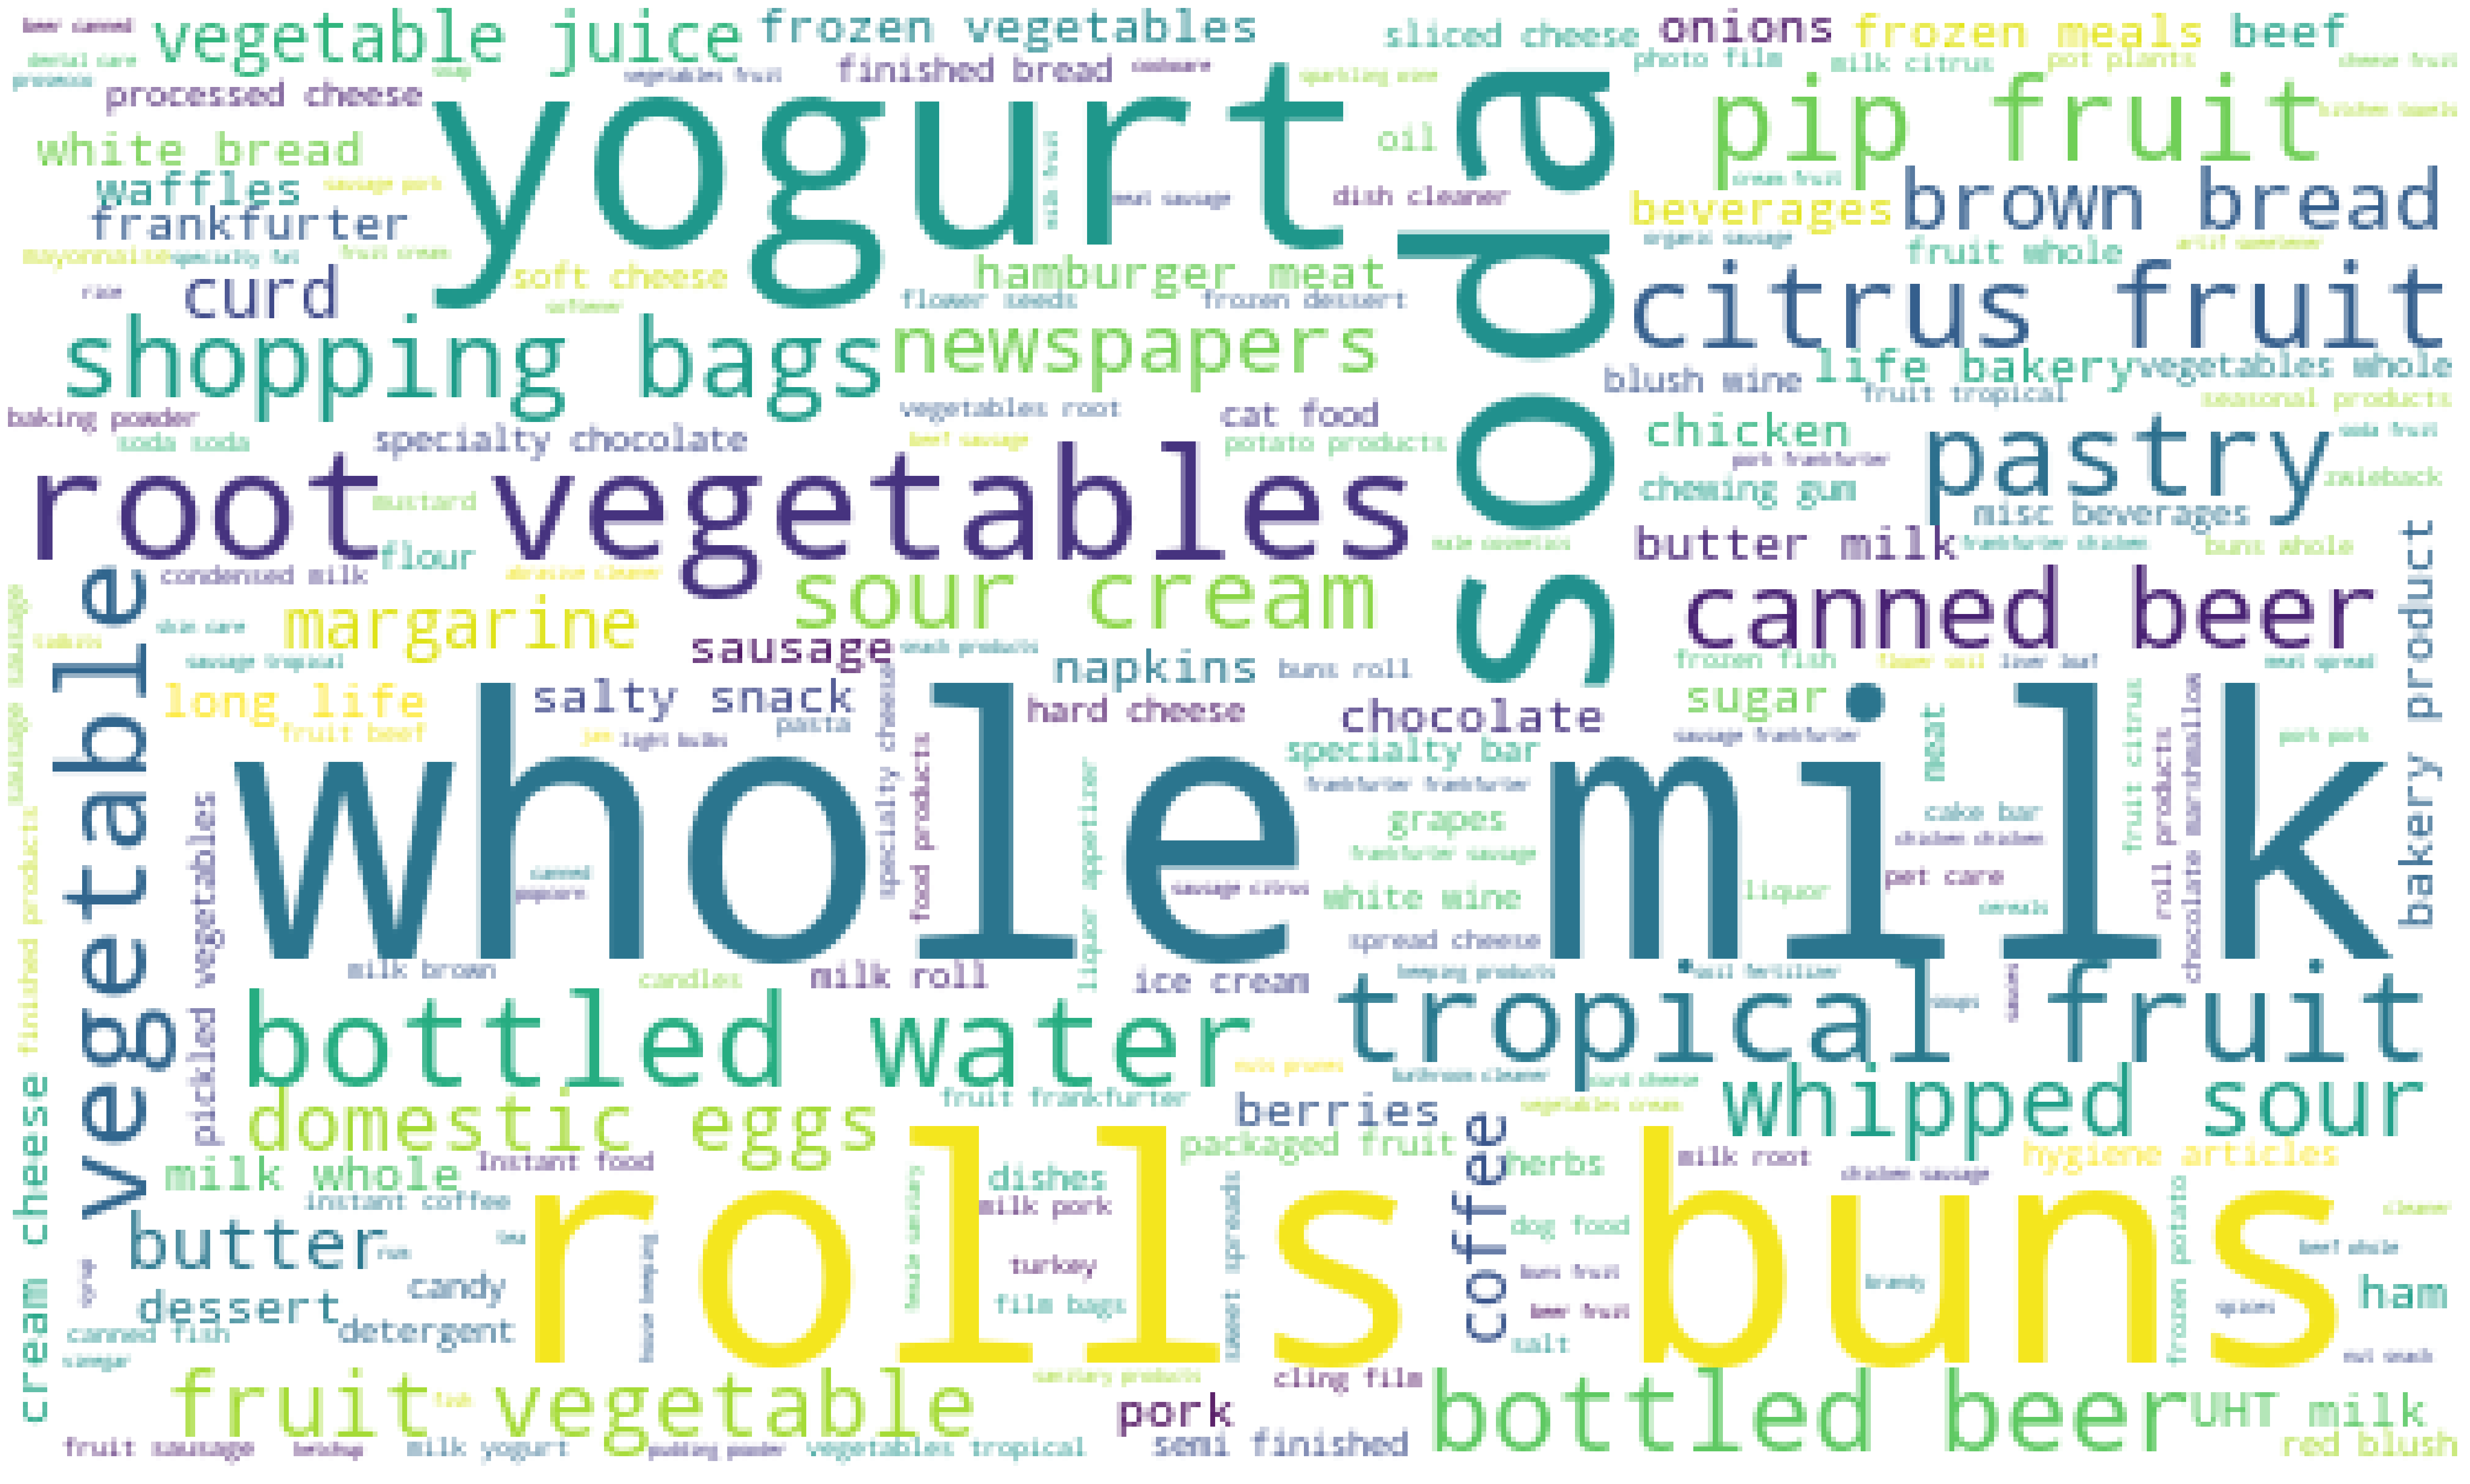

In [33]:
from wordcloud import WordCloud
plt.subplots(figsize=(100,70))
wordcloud = WordCloud(background_color = 'white',
                     width=500,
                     height=300).generate(','.join(gro_df['itemDescription']))
plt.imshow(wordcloud)
plt.axis('off')


### Transactions per month

<AxesSubplot:xlabel='Year_Months'>

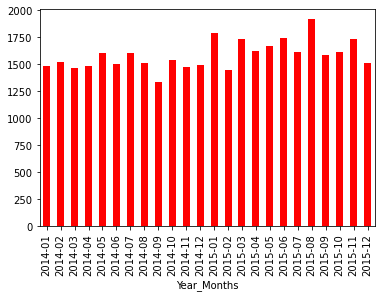

In [41]:
gro_df['Date']=gro_df['Date'].astype('datetime64[ns]')
gro_df["Year_Months"]=pd.to_datetime(gro_df['Date'].dt.year.astype('str')+"-"+gro_df['Date'].dt.month.astype('str')).dt.to_period('M')
gro_df[["Year_Months"]].groupby("Year_Months").size().plot(kind='bar',color='red')

#### Group items bought together by the same customer on the same date

In [44]:
c=gro_df.groupby(['Member_number','Date'])['itemDescription'].apply(','.join).reset_index()
c

,Member_number,Date,itemDescription
0,1000,2014-06-24,"whole milk,pastry,salty snack"
1,1000,2015-03-15,"sausage,whole milk,semi-finished bread,yogurt"
2,1000,2015-05-27,"soda,pickled vegetables"
3,1000,2015-07-24,"canned beer,misc. beverages"
4,1000,2015-11-25,"sausage,hygiene articles"
...,...,...,...
14958,4999,2015-05-16,"butter milk,whipped/sour cream"
14959,4999,2015-12-26,"bottled water,herbs"
14960,5000,2014-09-03,"fruit/vegetable juice,onions"
14961,5000,2014-11-16,"bottled beer,other vegetables"


### Converts itemsets to 2-D array

In [46]:
itemsets=c[['itemDescription']].values
itemsets=[(''.join(i).split(",")) for i in itemsets]
itemsets

[['whole milk', 'pastry', 'salty snack'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frankfurter', 'curd'],
 ['beef', 'white bread'],
 ['butter', 'whole milk'],
 ['frozen vegetables', 'other vegetables'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['frozen meals', 'dental care'],
 ['rolls/buns'],
 ['root vegetables', 'detergent'],
 ['sausage', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['root vegetables', 'whole milk', 'pastry'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['other vegetables', 'hygiene articles'],
 

### One hot Encoding

In [49]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(itemsets).transform(itemsets)
df_onehot = pd.DataFrame(te_ary, columns=te.columns_)
df_onehot

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Mining frequent Rules and association

0.001
1 0
0.9 0
0.8 0
0.7 0
0.6 0
0.5 0
0.4 0
0.3 0
0.2 2
0.1 130
0.05 450
0.03 805
0.01 1200
0.001 1238


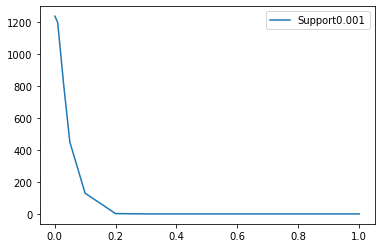

In [60]:
supportLevels =[0.01,0.009,0.007,0.005,0.003,0.001]
confidenceLevels=[1,0.9,0.8,0.7,0.6,0.5, 0.4, 0.3, 0.2, 0.1,0.05,0.03,0.01,0.001]
dict_lengths={}
for min_support in supportLevels:
    frequent_itemsets = apriori(df_onehot, min_support=min_support, use_colnames=True)
#length_frequent_itemsets.append(len(frequent_itemsets))
print(min_support)
conf_len_rules=[]
for min_confidence in confidenceLevels:
        rules = association_rules(frequent_itemsets, metric = "confidence",min_threshold = min_confidence)
        print(min_confidence,len(rules))
        conf_len_rules.append( (min_confidence, len(rules)) )
    #print(conf_len_rules)
plt.plot([i[0] for i in conf_len_rules],[i[1] for i in conf_len_rules],label="Support"+str(min_support))
plt.legend(loc="upper right")

In [63]:
frequent_itemsets = apriori(df_onehot, min_support=0.001, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.004010,(Instant food products),1
1,0.021386,(UHT-milk),1
2,0.001470,(abrasive cleaner),1
3,0.001938,(artif. sweetener),1
4,0.008087,(baking powder),1
...,...,...,...
745,0.001136,"(sausage, rolls/buns, whole milk)",3
746,0.001002,"(rolls/buns, soda, whole milk)",3
747,0.001337,"(yogurt, rolls/buns, whole milk)",3
748,0.001069,"(sausage, soda, whole milk)",3


### Association Rule

In [65]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.02)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755
1,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443
2,(UHT-milk),(rolls/buns),0.021386,0.110005,0.001804,0.084375,0.767013,-0.000548,0.972009
3,(UHT-milk),(root vegetables),0.021386,0.069572,0.001002,0.046875,0.673766,-0.000485,0.976187
4,(UHT-milk),(sausage),0.021386,0.060349,0.001136,0.053125,0.880298,-0.000154,0.992371
...,...,...,...,...,...,...,...,...,...
994,"(soda, whole milk)",(sausage),0.011629,0.060349,0.001069,0.091954,1.523708,0.000368,1.034806
995,"(yogurt, sausage)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541
996,"(yogurt, whole milk)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,0.000797,1.082219
997,"(sausage, whole milk)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681


In [68]:
rules=rules[rules['lift']>1].reset_index(drop=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(tropical fruit),(UHT-milk),0.067767,0.021386,0.001537,0.022682,1.060617,8.785064e-05,1.001326
1,(UHT-milk),(tropical fruit),0.021386,0.067767,0.001537,0.071875,1.060617,8.785064e-05,1.004426
2,(brown bread),(beef),0.037626,0.033950,0.001537,0.040853,1.203301,2.597018e-04,1.007196
3,(beef),(brown bread),0.033950,0.037626,0.001537,0.045276,1.203301,2.597018e-04,1.008012
4,(citrus fruit),(beef),0.053131,0.033950,0.001804,0.033962,1.000349,6.297697e-07,1.000012
...,...,...,...,...,...,...,...,...,...
184,"(soda, whole milk)",(sausage),0.011629,0.060349,0.001069,0.091954,1.523708,3.675264e-04,1.034806
185,"(yogurt, sausage)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,5.626300e-04,1.131541
186,"(yogurt, whole milk)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,7.967480e-04,1.082219
187,"(sausage, whole milk)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,7.012151e-04,1.093681


#### Scatterplot

C:\Users\HP\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\HP\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



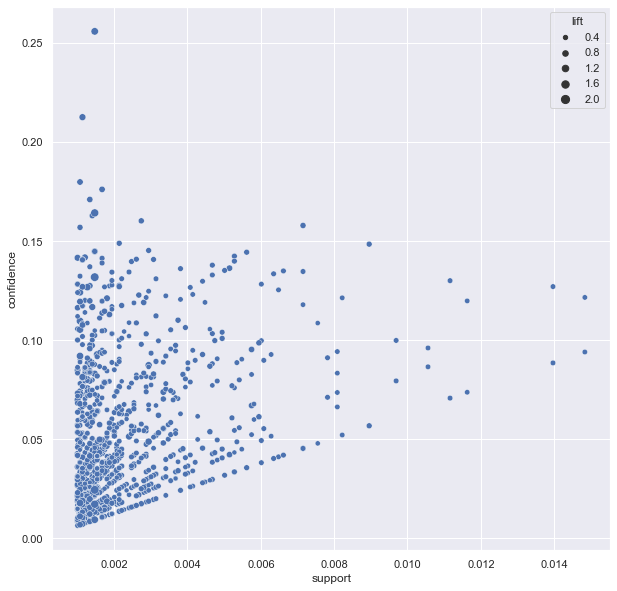

In [69]:
rules = association_rules(frequent_itemsets, metric = "confidence",min_threshold = 0.0)
sns.set(rc={'figure.figsize':(10,10)})
sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = rules)
plt.show()

In [308]:
#### Number of Items bought wrt Year

date_df= gro_df.groupby('Date')['itemDescription'].count().reset_index()
date_df

,Date,itemDescription
0,2014-01-01,48
1,2014-01-02,62
2,2014-01-03,53
3,2014-01-04,63
4,2014-01-05,43
...,...,...
723,2015-12-26,37
724,2015-12-27,71
725,2015-12-28,58
726,2015-12-29,56


In [309]:
date_df.max()

Date               2015-12-30
itemDescription            96
dtype: object

In [310]:
date_df.max()

Date               2015-12-30
itemDescription            96
dtype: object

#### Maximum product purchased on 30-12-2015 which is almost end of year.
#### It gives insight that for New Year Celebration, many people purchased different items.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\relational.py:436: MatplotlibDeprecationWarning:

Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\relational.py:514: MatplotlibDeprecationWarning:

Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.



Text(0, 0.5, 'Number of Items Sold')

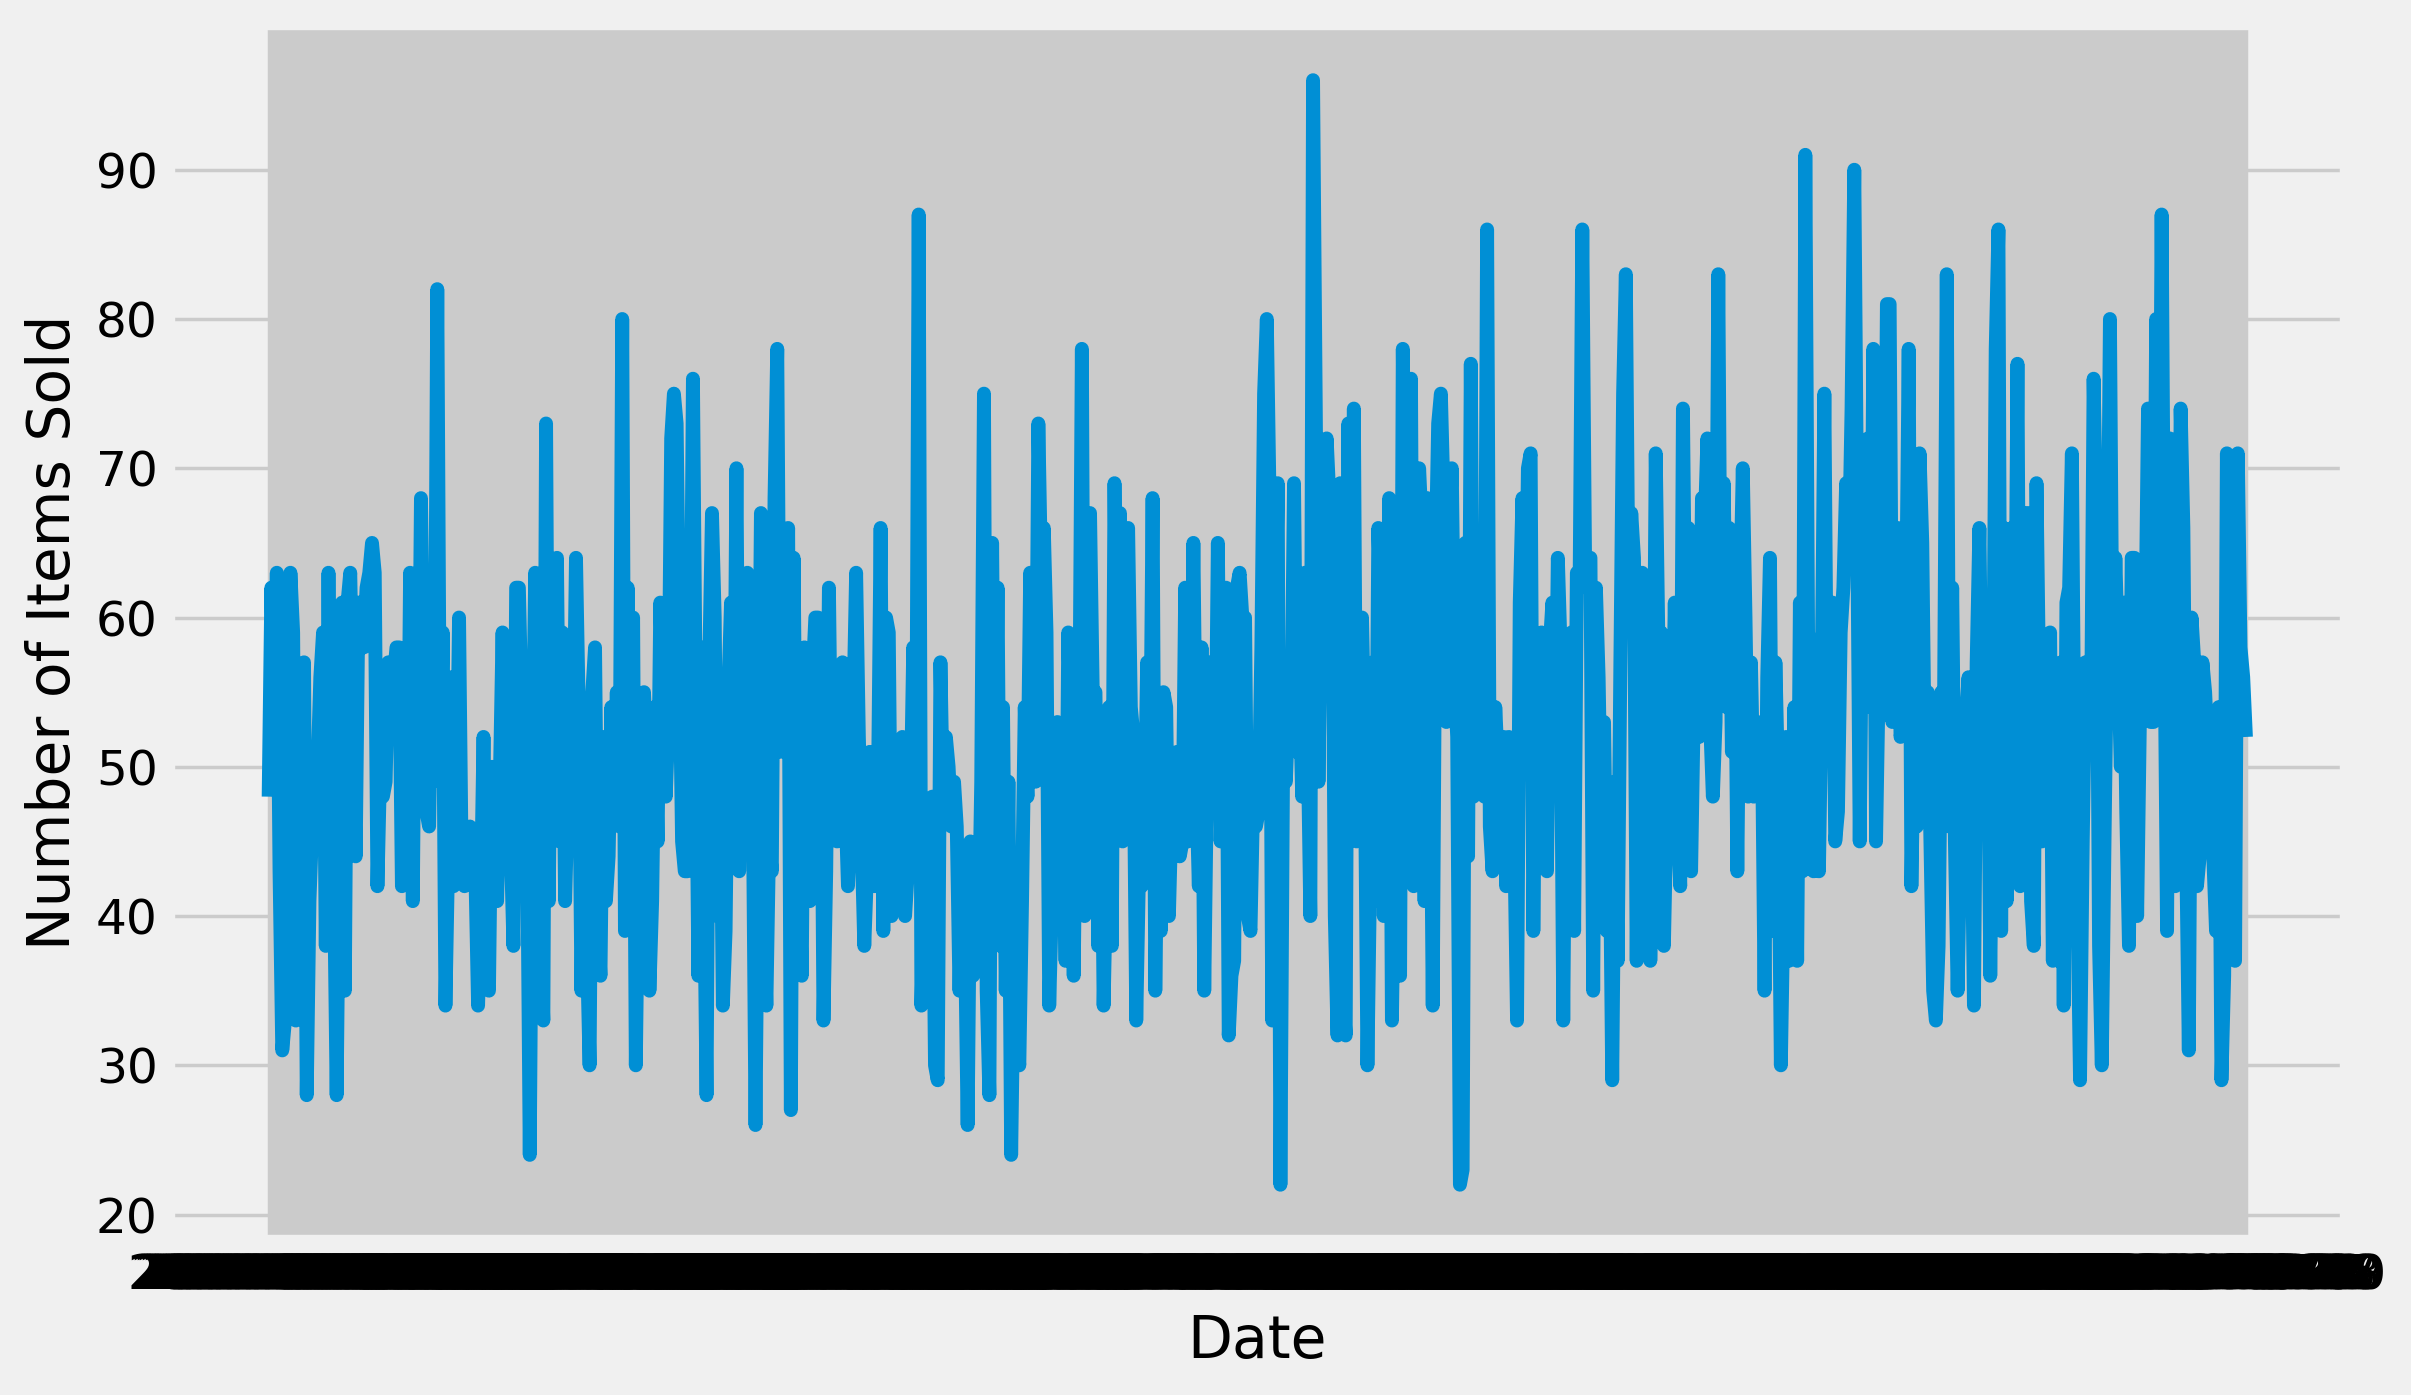

In [311]:
plt.figure(figsize=(10,6), dpi=250)
sns.lineplot(data= date_df, x='Date', y='itemDescription')
plt.xlabel('Date')
plt.ylabel('Number of Items Sold')

#### Day on which Max Number of Items were sold 

In [22]:
gro_df.groupby('Date')['itemDescription'].count().idxmax()

'2015-01-21'

#### Day on which Min Number of Items were sold 

In [313]:
gro_df.groupby('Date')['itemDescription'].count().idxmin()

'2015-01-09'

In [314]:
weekday_df= gro_df.groupby('day_of_week')['itemDescription'].count().reset_index()
weekday_df

,day_of_week,itemDescription
0,0,5203
1,1,5396
2,2,5561
3,3,5630
4,4,5399
5,5,5296
6,6,5521


In [315]:
month_df= gro_df.groupby('month')['itemDescription'].count()
month_df

month
1     3273
2     2962
3     3201
4     3108
5     3276
6     3246
7     3212
8     3435
9     2918
10    3155
11    3208
12    3012
Name: itemDescription, dtype: int64

In [316]:
year_df= gro_df.groupby('year')['itemDescription'].count()
year_df

year
2014    18025
2015    19981
Name: itemDescription, dtype: int64

In [317]:
m_df= gro_df.groupby('Member_number')['itemDescription'].count().reset_index()
m_df.max()

Member_number      5000
itemDescription      35
dtype: int64

### Top Five most sold items

<Figure size 3600x2800 with 0 Axes>

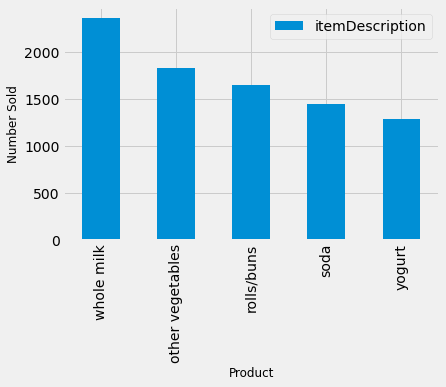

In [318]:
plt.figure(figsize=(9,7), dpi=400)
gro_df.itemDescription.value_counts(ascending=False).reset_index().head(5).plot(kind='bar', x='index')
plt.xlabel('Product', size= 12)
plt.ylabel('Number Sold', size= 12)
plt.show()

### Whole Milk , Other Vegetables, rolls/buns, soda,yogurt is the top 5 most sold items

## Data Transformation to implement Apriori and Association Algorithm

#### Number of Items bought by user in one transaction 

In [319]:
gro_df[(gro_df.Member_number==1808) & (gro_df.Date== '2015-07-21')]

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
16149,1808,2015-07-21,rolls/buns,2015,7,21,1
36088,1808,2015-07-21,candy,2015,7,21,1


#### Purchase History of Member_Number 1808

In [320]:
gro_df[(gro_df.Member_number==1808) & (gro_df.Date)]

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
4355,1808,2015-04-02,long life bakery product,2015,4,2,3
9090,1808,2014-11-29,meat,2014,11,29,5
11488,1808,2014-12-15,sugar,2014,12,15,0
16149,1808,2015-07-21,rolls/buns,2015,7,21,1
20504,1808,2015-04-02,semi-finished bread,2015,4,2,3
25239,1808,2014-11-29,whole milk,2014,11,29,5
27637,1808,2014-12-15,citrus fruit,2014,12,15,0
36088,1808,2015-07-21,candy,2015,7,21,1
38731,1808,2014-12-15,napkins,2014,12,15,0


### Creating an empty list transactions

In [321]:
member = gro_df.Member_number.values # extracting unique members
member

array([1808, 2552, 2300, ..., 1097, 1510, 1521], dtype=int64)

In [322]:
dates = gro_df.Date.values # extracting Dates
dates

array(['2015-07-21', '2015-05-01', '2015-09-19', ..., '2014-04-16',
       '2014-03-12', '2014-12-26'], dtype=object)

In [323]:
transactions = [list(gro_df[(gro_df['Member_number'] == i[0]) & (gro_df['Date'] == i[1])].itemDescription) for i in zip(member,dates)]

In [324]:
transactions[0]

['tropical fruit', 'rolls/buns', 'candy']

In [325]:
transactions

[['tropical fruit', 'rolls/buns', 'candy'],
 ['whole milk', 'tropical fruit', 'chocolate'],
 ['pip fruit', 'other vegetables', 'flour'],
 ['other vegetables', 'onions', 'shopping bags'],
 ['whole milk', 'other vegetables', 'white bread'],
 ['rolls/buns', 'citrus fruit', 'fruit/vegetable juice'],
 ['other vegetables', 'bottled water', 'shopping bags'],
 ['pot plants', 'citrus fruit', 'whipped/sour cream'],
 ['whole milk', 'specialty bar', 'newspapers'],
 ['tropical fruit', 'citrus fruit', 'soda'],
 ['citrus fruit', 'rolls/buns', 'pastry'],
 ['beef', 'bottled beer', 'specialty chocolate', 'yogurt', 'whole milk'],
 ['frankfurter', 'soda', 'canned beer', 'white bread', 'brown bread'],
 ['chicken', 'tropical fruit', 'waffles', 'whipped/sour cream', 'brown bread'],
 ['butter', 'other vegetables', 'soda', 'yogurt', 'UHT-milk'],
 ['fruit/vegetable juice',
  'hamburger meat',
  'soft cheese',
  'specialty chocolate',
  'bottled water'],
 ['packaged fruit/vegetables',
  'fish',
  'frozen meals',

In [326]:
print(len(transactions))

38006


### Creating Rules for Single Antecendent and Consequent

In [327]:
from itertools import permutations
flattenlist= [i for row in transactions for  i in row  ]
flattenlist= list(set(flattenlist))
rules = list(permutations(flattenlist,2))
rules[0], len(rules)

(('frozen dessert', 'organic products'), 27722)

## Finding the Most Common Combination

In [328]:
from collections import Counter
newlist= []
for i in transactions:
    newlist.append(tuple(i))


In [329]:
c= Counter(newlist)
c.most_common(1)

[(('other vegetables', 'whole milk'), 98)]

### Encoding the data using TransactionEncoder

In [330]:
from mlxtend.preprocessing import TransactionEncoder
encoder = TransactionEncoder().fit(transactions)
onehot = encoder.transform(transactions)
onehot = pd.DataFrame(onehot, columns = encoder.columns_)
onehot.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False


In [331]:
len(onehot)

38006

### Computing Support for Single Items

In [332]:
print(onehot.mean())

Instant food products    0.004499
UHT-milk                 0.024575
abrasive cleaner         0.001921
artif. sweetener         0.002947
baby cosmetics           0.000316
                           ...   
white bread              0.029022
white wine               0.013840
whole milk               0.181445
yogurt                   0.100931
zwieback                 0.004868
Length: 167, dtype: float64


### Computing Support, Confidence, Zhang Metric and Lift for other vegetables <- Whole Milk

In [333]:
onehot['other vegetables & whole milk'] = np.logical_and(onehot['other vegetables'],onehot['whole milk'])

### Support

In [334]:
support_milk= onehot['whole milk'].mean()
support_vegetable= onehot['other vegetables & whole milk'].mean()
support_vegandmilk= np.logical_and(onehot['other vegetables'],onehot['whole milk']).mean()
print("support for veg and milk:", support_vegandmilk)
print("support for vegetable:", support_vegetable)
print("support for Milk:", support_milk)

support for veg and milk: 0.021943903594169343
support for vegetable: 0.021943903594169343
support for Milk: 0.18144503499447456


### Confidence

In [335]:
confidence= support_vegandmilk/support_vegetable
print("Confidence: ", confidence)

Confidence:  1.0


### Lift

In [336]:
lift = support_vegandmilk/(support_vegetable* support_milk)
print("Lift: ", lift)

Lift:  5.511310904872389


### Leverage

In [337]:
Leverage= support_vegandmilk - (support_vegetable* support_milk)
print("Leverage: ", Leverage)

Leverage:  0.01796229123860991


### Zhang Metric

In [338]:
num = support_vegandmilk - support_milk*support_vegetable

In [339]:
denom = max(support_vegandmilk*(1-support_vegetable), support_vegetable*(support_milk-support_vegandmilk))

In [340]:
zhang = num / denom
print("Zhang Metric :" ,zhang) 

Zhang Metric : 0.8369202625632196


####  Zhang Metric value is positive, so positive association 

## Implementing the Apriori Algorithm

In [341]:
frequent_itemsets = apriori(onehot, min_support = 0.01, max_len = 3, use_colnames = True)
print(len(frequent_itemsets))

92


In [342]:
frequent_itemsets.head()

,support,itemsets
0,0.024575,(UHT-milk)
1,0.039599,(beef)
2,0.024917,(berries)
3,0.019365,(beverages)
4,0.054860,(bottled beer)


## Implementing Association Rules

In [343]:
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets = apriori(onehot, use_colnames=True, min_support=0.01, max_len = 2)

#### Pruning using support

In [344]:
rules = association_rules(frequent_itemsets,metric = "support",min_threshold = 0.00)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled beer),(whole milk),0.054860,0.181445,0.010472,0.190887,1.052039,0.000518,1.011670
1,(whole milk),(bottled beer),0.181445,0.054860,0.010472,0.057715,1.052039,0.000518,1.003030
2,(bottled water),(whole milk),0.069226,0.181445,0.010209,0.147472,0.812766,-0.002352,0.960151
3,(whole milk),(bottled water),0.181445,0.069226,0.010209,0.056265,0.812766,-0.002352,0.986266
4,(citrus fruit),(whole milk),0.060911,0.181445,0.011261,0.184881,1.018938,0.000209,1.004216


In [345]:
len(rules)

42

In [346]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled beer),(whole milk),0.054860,0.181445,0.010472,0.190887,1.052039,0.000518,1.011670
1,(whole milk),(bottled beer),0.181445,0.054860,0.010472,0.057715,1.052039,0.000518,1.003030
2,(bottled water),(whole milk),0.069226,0.181445,0.010209,0.147472,0.812766,-0.002352,0.960151
3,(whole milk),(bottled water),0.181445,0.069226,0.010209,0.056265,0.812766,-0.002352,0.986266
4,(citrus fruit),(whole milk),0.060911,0.181445,0.011261,0.184881,1.018938,0.000209,1.004216
5,(whole milk),(citrus fruit),0.181445,0.060911,0.011261,0.062065,1.018938,0.000209,1.001230
6,(other vegetables),(rolls/buns),0.136531,0.126822,0.015576,0.114087,0.899587,-0.001739,0.985625
7,(rolls/buns),(other vegetables),0.126822,0.136531,0.015576,0.122822,0.899587,-0.001739,0.984371
8,(sausage),(other vegetables),0.074225,0.136531,0.010840,0.146048,1.069702,0.000706,1.011144
9,(other vegetables),(sausage),0.136531,0.074225,0.010840,0.079399,1.069702,0.000706,1.005620


In [347]:
rules.consequents.unique()

array([frozenset({'whole milk'}), frozenset({'bottled beer'}),
       frozenset({'bottled water'}), frozenset({'citrus fruit'}),
       frozenset({'rolls/buns'}), frozenset({'other vegetables'}),
       frozenset({'sausage'}), frozenset({'soda'}), frozenset({'yogurt'}),
       frozenset({'other vegetables & whole milk'}),
       frozenset({'pastry'}), frozenset({'root vegetables'}),
       frozenset({'tropical fruit'})], dtype=object)

#### Computing Zhang's Rule to see disassociation

In [348]:
def zhangs_rule(rules):
    rule_support = rules['support'].copy()
    rule_ante = rules['antecedent support'].copy()
    rule_conseq = rules['consequent support'].copy()
    num = rule_support - (rule_ante * rule_conseq)
    denom = np.max((rule_support * (1 - rule_ante).values, 
                          rule_ante * (rule_conseq - rule_support).values), axis = 0)
    return num / denom

rules_zhangs_list = zhangs_rule(rules)
rules = rules.assign(zhang = rules_zhangs_list)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
0,(bottled beer),(whole milk),0.054860,0.181445,0.010472,0.190887,1.052039,0.000518,1.011670,0.052336
1,(whole milk),(bottled beer),0.181445,0.054860,0.010472,0.057715,1.052039,0.000518,1.003030,0.060430
2,(bottled water),(whole milk),0.069226,0.181445,0.010209,0.147472,0.812766,-0.002352,0.960151,-0.198396
3,(whole milk),(bottled water),0.181445,0.069226,0.010209,0.056265,0.812766,-0.002352,0.986266,-0.219622
4,(citrus fruit),(whole milk),0.060911,0.181445,0.011261,0.184881,1.018938,0.000209,1.004216,0.019791


### From this, we can see that whole milk is always bought with bottled beer or bottled water or citrus fruit

#### filtering the value with zhang rules <0 to see disassociation

In [349]:
rules[rules.zhang<=0]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
2,(bottled water),(whole milk),0.069226,0.181445,0.010209,0.147472,0.812766,-0.002352,0.960151,-0.198396
3,(whole milk),(bottled water),0.181445,0.069226,0.010209,0.056265,0.812766,-0.002352,0.986266,-0.219622
6,(other vegetables),(rolls/buns),0.136531,0.126822,0.015576,0.114087,0.899587,-0.001739,0.985625,-0.114473
7,(rolls/buns),(other vegetables),0.126822,0.136531,0.015576,0.122822,0.899587,-0.001739,0.984371,-0.113344
10,(soda),(other vegetables),0.111482,0.136531,0.013945,0.125089,0.916191,-0.001276,0.986921,-0.093343
11,(other vegetables),(soda),0.136531,0.111482,0.013945,0.102139,0.916191,-0.001276,0.989594,-0.095792
12,(other vegetables),(whole milk),0.136531,0.181445,0.021944,0.160725,0.885803,-0.002829,0.975312,-0.129908
13,(whole milk),(other vegetables),0.181445,0.136531,0.021944,0.120940,0.885803,-0.002829,0.982264,-0.136066
14,(yogurt),(other vegetables),0.100931,0.136531,0.012288,0.121741,0.891675,-0.001493,0.983160,-0.119038
15,(other vegetables),(yogurt),0.136531,0.100931,0.012288,0.089998,0.891675,-0.001493,0.987985,-0.123340


#### filtering the value with zhang rules >0  to see positive association 

In [350]:
rules[rules.zhang>0].sort_values('zhang', ascending=False) 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
41,(whole milk),(other vegetables & whole milk),0.181445,0.021944,0.021944,0.120940,5.511311,0.017962,1.112615,1.000000
16,(other vegetables),(other vegetables & whole milk),0.136531,0.021944,0.021944,0.160725,7.324340,0.018948,1.165358,1.000000
17,(other vegetables & whole milk),(other vegetables),0.021944,0.136531,0.021944,1.000000,7.324340,0.018948,inf,0.882842
40,(other vegetables & whole milk),(whole milk),0.021944,0.181445,0.021944,1.000000,5.511311,0.017962,inf,0.836920
32,(yogurt),(sausage),0.100931,0.074225,0.010051,0.099583,1.341633,0.002559,1.028162,0.283226
33,(sausage),(yogurt),0.074225,0.100931,0.010051,0.135413,1.341633,0.002559,1.039882,0.275056
28,(soda),(sausage),0.111482,0.074225,0.010051,0.090158,1.214658,0.001776,1.017512,0.198896
29,(sausage),(soda),0.074225,0.111482,0.010051,0.135413,1.214658,0.001776,1.027679,0.190892
31,(whole milk),(sausage),0.181445,0.074225,0.014998,0.082657,1.113593,0.001530,1.009191,0.124617
30,(sausage),(whole milk),0.074225,0.181445,0.014998,0.202056,1.113593,0.001530,1.025830,0.110185


#### Pruning using Leverage metric

In [351]:
rules = association_rules(frequent_itemsets,metric = "leverage", min_threshold = 0)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled beer),(whole milk),0.054860,0.181445,0.010472,0.190887,1.052039,0.000518,1.011670
1,(whole milk),(bottled beer),0.181445,0.054860,0.010472,0.057715,1.052039,0.000518,1.003030
2,(citrus fruit),(whole milk),0.060911,0.181445,0.011261,0.184881,1.018938,0.000209,1.004216
3,(whole milk),(citrus fruit),0.181445,0.060911,0.011261,0.062065,1.018938,0.000209,1.001230
4,(sausage),(other vegetables),0.074225,0.136531,0.010840,0.146048,1.069702,0.000706,1.011144


In [352]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled beer),(whole milk),0.054860,0.181445,0.010472,0.190887,1.052039,0.000518,1.011670
1,(whole milk),(bottled beer),0.181445,0.054860,0.010472,0.057715,1.052039,0.000518,1.003030
2,(citrus fruit),(whole milk),0.060911,0.181445,0.011261,0.184881,1.018938,0.000209,1.004216
3,(whole milk),(citrus fruit),0.181445,0.060911,0.011261,0.062065,1.018938,0.000209,1.001230
4,(sausage),(other vegetables),0.074225,0.136531,0.010840,0.146048,1.069702,0.000706,1.011144
5,(other vegetables),(sausage),0.136531,0.074225,0.010840,0.079399,1.069702,0.000706,1.005620
6,(other vegetables),(other vegetables & whole milk),0.136531,0.021944,0.021944,0.160725,7.324340,0.018948,1.165358
7,(other vegetables & whole milk),(other vegetables),0.021944,0.136531,0.021944,1.000000,7.324340,0.018948,inf
8,(soda),(sausage),0.111482,0.074225,0.010051,0.090158,1.214658,0.001776,1.017512
9,(sausage),(soda),0.074225,0.111482,0.010051,0.135413,1.214658,0.001776,1.027679


In [353]:
len(rules)

18

In [354]:
rules.consequents.unique()

array([frozenset({'whole milk'}), frozenset({'bottled beer'}),
       frozenset({'citrus fruit'}), frozenset({'other vegetables'}),
       frozenset({'sausage'}),
       frozenset({'other vegetables & whole milk'}), frozenset({'soda'}),
       frozenset({'yogurt'})], dtype=object)

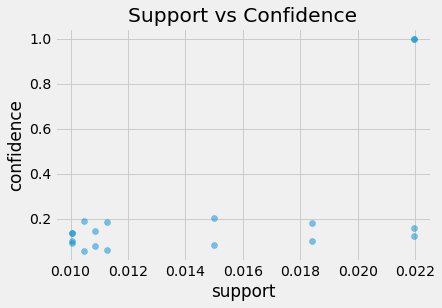

In [355]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

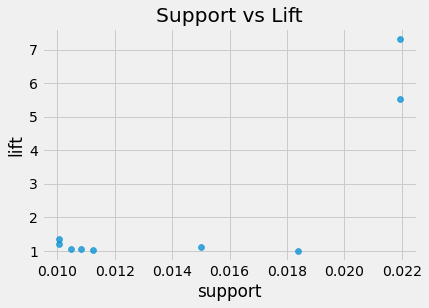

In [356]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

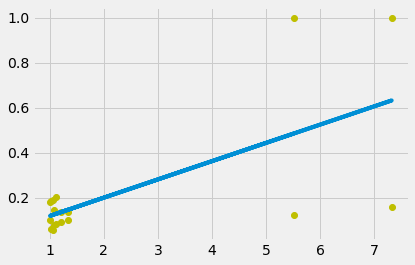

In [357]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'],fit_fn(rules['lift']))

### Multi Metric Filtering

#### Targeting consequent == whole milk

In [358]:
targeted_rules = rules[rules['consequents'] == {('whole milk')}].copy()
targeted_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled beer),(whole milk),0.054860,0.181445,0.010472,0.190887,1.052039,0.000518,1.011670
2,(citrus fruit),(whole milk),0.060911,0.181445,0.011261,0.184881,1.018938,0.000209,1.004216
10,(sausage),(whole milk),0.074225,0.181445,0.014998,0.202056,1.113593,0.001530,1.025830
14,(yogurt),(whole milk),0.100931,0.181445,0.018392,0.182221,1.004277,0.000078,1.000949
16,(other vegetables & whole milk),(whole milk),0.021944,0.181445,0.021944,1.000000,5.511311,0.017962,inf


In [359]:
filtered_rules = targeted_rules[(targeted_rules['antecedent support'] > 0.01) &
(targeted_rules['support'] > 0.009) &
(targeted_rules['confidence'] > 0.85) &
(targeted_rules['lift'] > 1.00)]

In [360]:
print(filtered_rules['antecedents'])

16    (other vegetables & whole milk)
Name: antecedents, dtype: object


#### Targeting consequent == sausage

In [361]:
targeted_rules1 = rules[rules['consequents'] == {('sausage')}].copy()
targeted_rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(other vegetables),(sausage),0.136531,0.074225,0.010840,0.079399,1.069702,0.000706,1.005620
8,(soda),(sausage),0.111482,0.074225,0.010051,0.090158,1.214658,0.001776,1.017512
11,(whole milk),(sausage),0.181445,0.074225,0.014998,0.082657,1.113593,0.001530,1.009191
12,(yogurt),(sausage),0.100931,0.074225,0.010051,0.099583,1.341633,0.002559,1.028162


In [362]:
filtered_rules1 = targeted_rules1[(targeted_rules1['antecedent support'] > 0.01) &
(targeted_rules1['support'] > 0.009) &
(targeted_rules1['confidence'] > 0.095) &
(targeted_rules1['lift'] > 1.00)]

print(filtered_rules1['antecedents'])

12    (yogurt)
Name: antecedents, dtype: object


#### Targeting antecedents  == whole milk

In [363]:
targeted_rules2 = rules[rules['antecedents'] == {('whole milk')}].copy()
targeted_rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(whole milk),(bottled beer),0.181445,0.054860,0.010472,0.057715,1.052039,0.000518,1.003030
3,(whole milk),(citrus fruit),0.181445,0.060911,0.011261,0.062065,1.018938,0.000209,1.001230
11,(whole milk),(sausage),0.181445,0.074225,0.014998,0.082657,1.113593,0.001530,1.009191
15,(whole milk),(yogurt),0.181445,0.100931,0.018392,0.101363,1.004277,0.000078,1.000480
17,(whole milk),(other vegetables & whole milk),0.181445,0.021944,0.021944,0.120940,5.511311,0.017962,1.112615


### Visualising the rules

In [364]:
frequent_itemsets = apriori(onehot, min_support=0.01,use_colnames=True, max_len=2)
len(frequent_itemsets )

91

In [365]:
rules = association_rules(frequent_itemsets,metric = "support",min_threshold = 0.0)
len(rules)

42

#### Convert antecedents and consequents into strings

In [366]:
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

In [367]:
print(rules[['antecedents','consequents']].head())

     antecedents    consequents
0   bottled beer     whole milk
1     whole milk   bottled beer
2  bottled water     whole milk
3     whole milk  bottled water
4   citrus fruit     whole milk


In [368]:
support_table = rules.pivot(index='consequents', columns='antecedents',values='support')
support_table.head()

antecedents,bottled beer,bottled water,citrus fruit,other vegetables,other vegetables & whole milk,pastry,rolls/buns,root vegetables,sausage,soda,tropical fruit,whole milk,yogurt
consequents,,,,,,,,,,,,,
bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010472,NaN
bottled water,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010209,NaN
citrus fruit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011261,NaN
other vegetables,NaN,NaN,NaN,NaN,0.021944,NaN,0.015576,NaN,0.01084,0.013945,NaN,0.021944,0.012288
other vegetables & whole milk,NaN,NaN,NaN,0.021944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021944,NaN


C:\Users\HP\anaconda3\lib\site-packages\seaborn\matrix.py:302: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\matrix.py:312: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



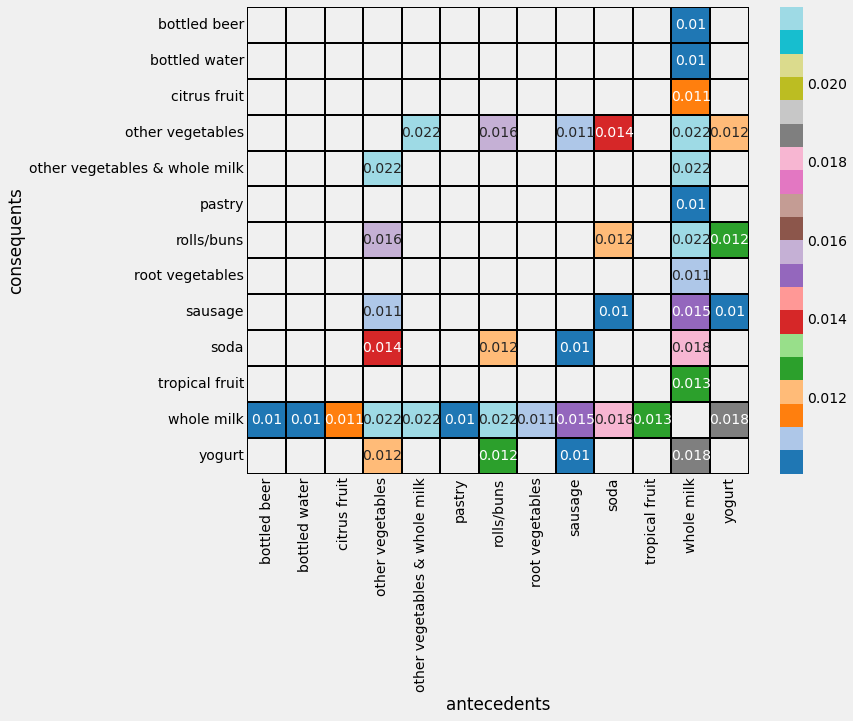

In [369]:
plt.figure(figsize=(10,8))
sns.heatmap(support_table, cmap= "tab20", annot=True, linewidths= 2, linecolor= 'black')
plt.show()

#### From heat map above, we can see following association:
1. other vegetable <-- whole milk
2. rolls/buns <-- whole milk 

<AxesSubplot:xlabel='antecedent support', ylabel='consequent support'>

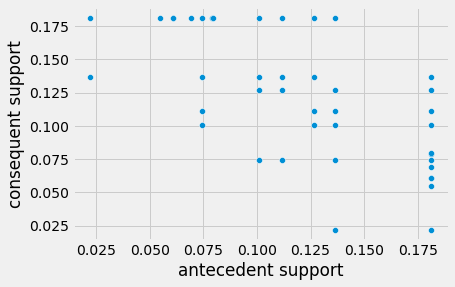

In [370]:
sns.scatterplot(x="antecedent support", y="consequent support", data=rules)

<AxesSubplot:xlabel='antecedent support', ylabel='consequent support'>

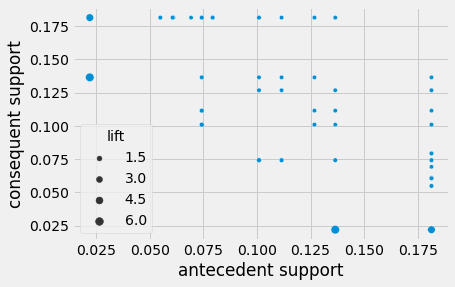

In [371]:
sns.scatterplot(x="antecedent support",y="consequent support",size="lift",data=rules)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\HP\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



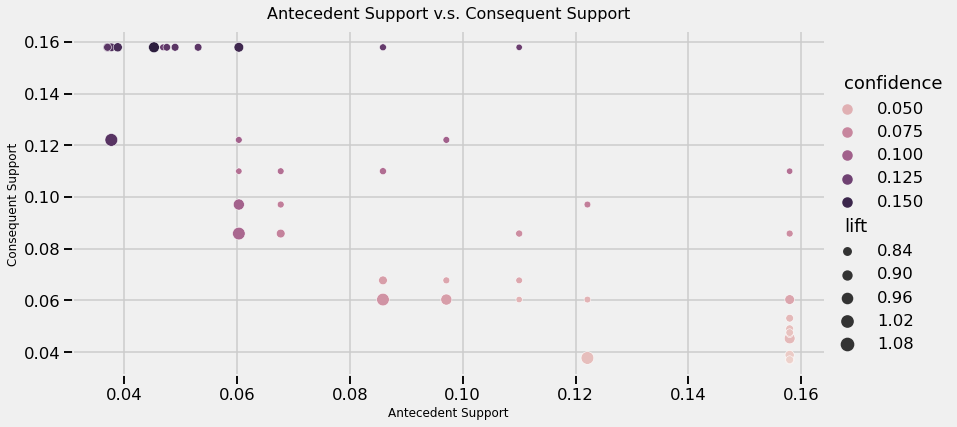

In [413]:
# take a quick look at the distribution of the product combination
sns.set_context("talk")
sns.relplot(x='antecedent support', y='consequent support', data=rules, 
            size='lift', hue='confidence', height=6, aspect=2)
plt.title("Antecedent Support v.s. Consequent Support", fontsize=16, y=1.02)
plt.xlabel('Antecedent Support', fontsize=12)
plt.ylabel('Consequent Support', fontsize=12)
plt.show()

#### From above scatter plot , we can observe that no support exceeds value 0.18. 

### Parallel coordinate plots to observe Rules

In [372]:
frequent_itemsets = apriori(onehot, min_support=0.01,use_colnames=True, max_len=2)
rules = association_rules(frequent_itemsets,metric = 'lift', min_threshold = 1.00)

In [373]:
rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
rules['rule'] = rules.index

In [374]:
coords = rules[['antecedent','consequent','rule']]
print(coords.head(1))

     antecedent  consequent  rule
0  bottled beer  whole milk     0


In [375]:
from pandas.plotting import parallel_coordinates

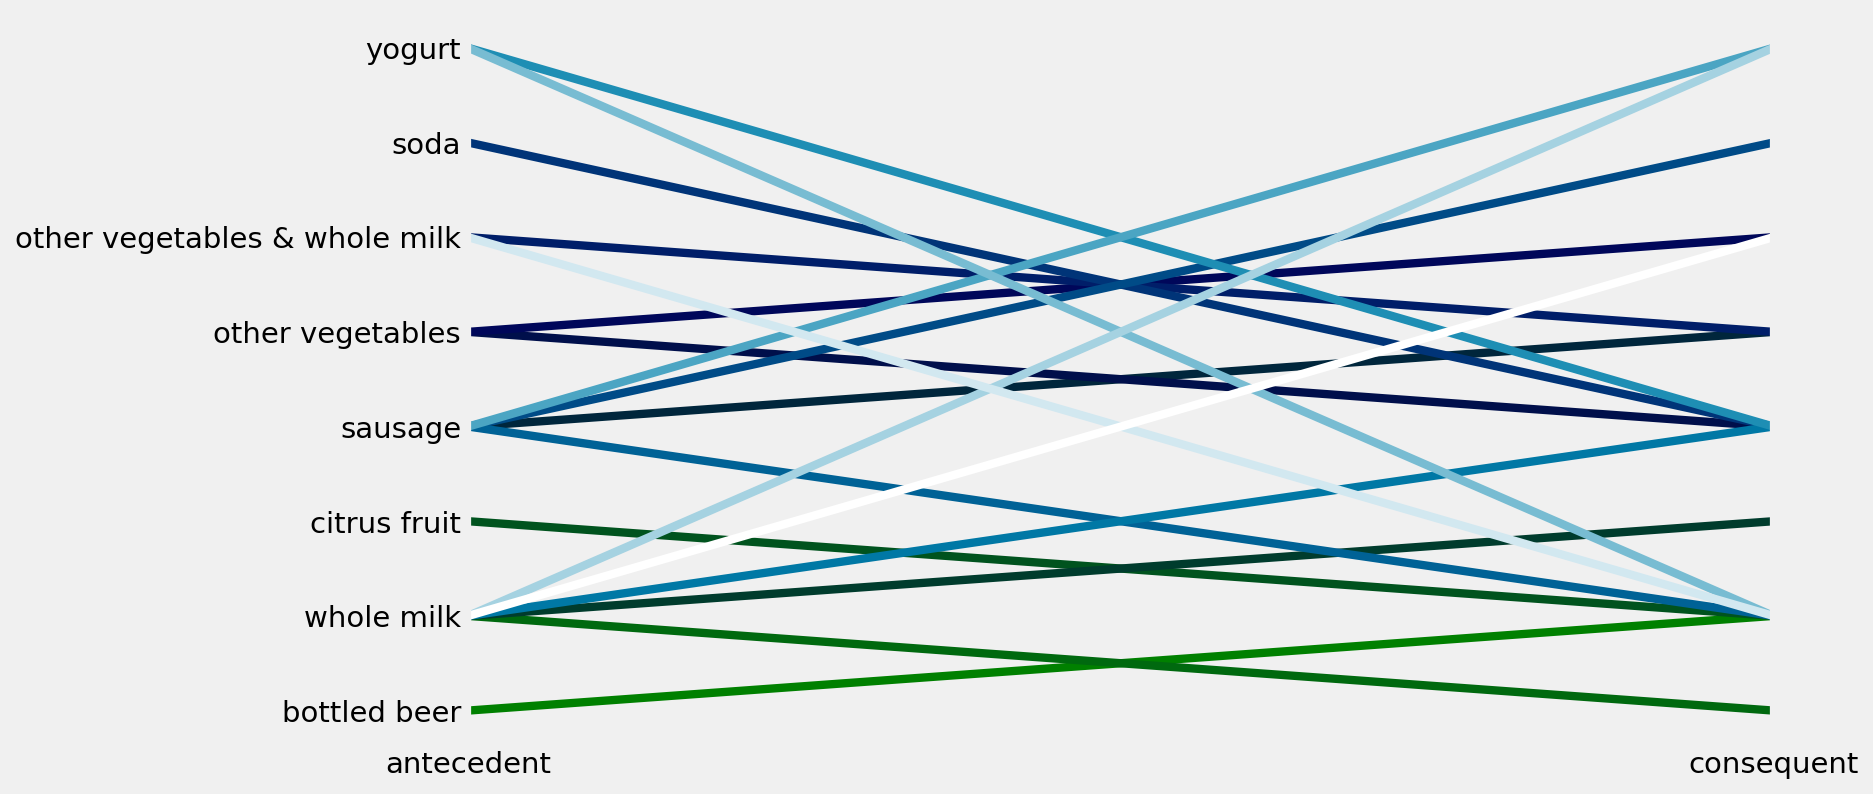

In [376]:
plt.figure(figsize= (10,6), dpi= 150)
ax= parallel_coordinates(coords, 'rule', colormap = 'ocean')
leg = plt.legend()
ax.get_legend().remove()
plt.show()

#### From the plot above, we can different associations of antencendent and consequent in which ligher shaded lines shows stronger association such as yogurt <- whole milk 

In [378]:
def zhangs_rule(rules):
    rule_support = rules['support'].copy()
    rule_ante = rules['antecedent support'].copy()
    rule_conseq = rules['consequent support'].copy()
    num = rule_support - (rule_ante * rule_conseq)
    denom = np.max((rule_support * (1 - rule_ante).values, 
                          rule_ante * (rule_conseq - rule_support).values), axis = 0)
    return num / denom

rules_zhangs_list = zhangs_rule(rules)
rules = rules.assign(zhang = rules_zhangs_list)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent,consequent,rule,zhang
0,(bottled beer),(whole milk),0.054860,0.181445,0.010472,0.190887,1.052039,0.000518,1.011670,bottled beer,whole milk,0,0.052336
1,(whole milk),(bottled beer),0.181445,0.054860,0.010472,0.057715,1.052039,0.000518,1.003030,whole milk,bottled beer,1,0.060430
2,(citrus fruit),(whole milk),0.060911,0.181445,0.011261,0.184881,1.018938,0.000209,1.004216,citrus fruit,whole milk,2,0.019791
3,(whole milk),(citrus fruit),0.181445,0.060911,0.011261,0.062065,1.018938,0.000209,1.001230,whole milk,citrus fruit,3,0.022706
4,(sausage),(other vegetables),0.074225,0.136531,0.010840,0.146048,1.069702,0.000706,1.011144,sausage,other vegetables,4,0.070384


#### From this we can see whole milk is bought with beer and citrus fruits and sausages are bought with other vegetables

In [399]:
gro_df['date'] = pd.to_datetime(gro_df[['year', 'month', 'day']])
gro_df.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week,date
0,1808,2015-07-21,tropical fruit,2015,7,21,1,2015-07-21
1,2552,2015-05-01,whole milk,2015,5,1,4,2015-05-01
2,2300,2015-09-19,pip fruit,2015,9,19,5,2015-09-19
3,1187,2015-12-12,other vegetables,2015,12,12,5,2015-12-12
4,3037,2015-01-02,whole milk,2015,1,2,4,2015-01-02


In [400]:
gro_df['member_date'] = list(zip(gro_df['Member_number'], gro_df['date'].dt.date))
gro_df['quantity'] = 1

In [402]:
gro_df.shape

(38765, 10)

In [403]:
gro_df.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week,date,member_date,quantity
0,1808,2015-07-21,tropical fruit,2015,7,21,1,2015-07-21,"(1808, 2015-07-21)",1
1,2552,2015-05-01,whole milk,2015,5,1,4,2015-05-01,"(2552, 2015-05-01)",1
2,2300,2015-09-19,pip fruit,2015,9,19,5,2015-09-19,"(2300, 2015-09-19)",1
3,1187,2015-12-12,other vegetables,2015,12,12,5,2015-12-12,"(1187, 2015-12-12)",1
4,3037,2015-01-02,whole milk,2015,1,2,4,2015-01-02,"(3037, 2015-01-02)",1


In [404]:
gro_df.groupby('itemDescription').size().sort_values(ascending=False)

itemDescription
whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
preservation products       1
kitchen utensil             1
Length: 167, dtype: int64

#### Total 167 unique items present in dataset .
##### Whole Milk is highest purchased product where kitechn utensil and preservation products are least purchased.

In [405]:
basket = gro_df.groupby(['member_date', 'itemDescription'])['quantity'].count().unstack().fillna(0)
basket.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
member_date,,,,,,,,,,,,,,,,,,,,,
"(1000, 2014-06-24)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
"(1000, 2015-03-15)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
"(1000, 2015-05-27)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(1000, 2015-07-24)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(1000, 2015-11-25)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [406]:
def convert_values(value):
    if value >= 1:
        return 1
    else:
        return 0 

In [407]:
basket = basket.applymap(convert_values)

In [408]:
basket_items = apriori(basket, min_support = 0.005, use_colnames = True, max_len = 2)

C:\Users\HP\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



In [409]:
rules = association_rules(basket_items, metric = 'lift')

In [410]:
rules.sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874
32,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811
12,(newspapers),(whole milk),0.038896,0.157923,0.005614,0.144330,0.913926,-0.000529,0.984114
7,(domestic eggs),(whole milk),0.037091,0.157923,0.005280,0.142342,0.901341,-0.000578,0.981834
10,(frankfurter),(whole milk),0.037760,0.157923,0.005280,0.139823,0.885388,-0.000683,0.978958
8,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420
20,(pork),(whole milk),0.037091,0.157923,0.005012,0.135135,0.855703,-0.000845,0.973652
18,(pip fruit),(whole milk),0.049054,0.157923,0.006616,0.134877,0.854071,-0.001130,0.973362
4,(citrus fruit),(whole milk),0.053131,0.157923,0.007151,0.134591,0.852259,-0.001240,0.973040
36,(shopping bags),(whole milk),0.047584,0.157923,0.006349,0.133427,0.844887,-0.001166,0.971732


#### Here, whole milk is the most purchased product in this shop after that sausage is most purchased.

> **This analysis can also be used to make product recomendation, or to verify if certain product combos are behaving as expected.**

> **Top 10 sold items are whole milk, other vegetables, rolls/buns, soda, yogurt, root vegetables, tropical fruit, bottled water, sausage, and citrus fruit.**

> **Top 5 consequents of whole milk are other vegetables, rolls/buns, soda, tropical fruit, and yogurt.**

> **Every item in the top 10 percentile of all combinations has high confidence that customers buy the items with the whole wilk.**

> **Regarding the network graphics, whole milk has the highest number of connections with other items.**